<a href="https://colab.research.google.com/github/wamo12/Spoon-Knife/blob/main/corp_credit_capstone_(7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Portfolio Composition


## Introduction

The objective is to develop a diversified portfolio selection strategy using credit ratings and financial ratios. This data-driven approach will involve exploratory data analysis and feature engineering as a mechanism for portfolio construction, based solely on credit ratings and financial ratios from dataset companies.  A market-driven benchmark model will be created, determining sector allocation, credit rating selection, and issuer selection based on an analysis of current market conditions and a 12-month outlook. The study will compare the (EDA) Financial Ratios data-driven strategy against the market-driven approach by evaluating sector allocation and credit quality distribution. Additionally, the data-driven strategy's performance will be compared against a broader market benchmark to assess the relative effectiveness of portfolio selection and construction. This comprehensive analysis aims to determine the strengths and potential advantages of a fundamental equity data-driven approach compared to traditional market-driven strategies.

### Fundamental Analysis: Return On Equity, ROE

The rates of return on common stocks in the United States over the past century have consistently ranged from 9% to 10% on an annualized basis. This rate closely aligns with the real return on the owner's capital in these businesses. Thus, it’s been posited that the return on an asset will approximate its ***Return on Equity*** (***ROE***).

### Importance of Return On Tangible Equity, ROTE in Banking Insurance and Real Estate

***Return on Tangible Equity***,(***ROTE***) is a crucial financial metric for assessing profitability and efficiency, especially in banks and insurance companies. It measures how well a company generates profits from its tangible equity, excluding intangible assets like goodwill. A ROTE above 10% indicates strong performance and operational efficiency. For banks, ROTE is particularly significant in evaluating risk management practices. Since banks operate under stringent regulatory frameworks, maintaining a healthy ROTE can indicate robust risk management and capital adequacy. It helps assess how well banks can withstand economic downturns while still delivering returns to shareholders.

ROTE is a significant financial metric in the real estate sector, providing insights into how effectively companies utilize their tangible assets to generate profits. This metric is particularly relevant in real estate due to the capital-intensive nature of the industry, where physical assets such as buildings and land play a crucial role in generating income.

### Operating CashF Flow per share as an overlay

Investors use ROE to compare companies within the same industry, identifying those that excel at converting equity into profit and serving as a benchmark for investment decisions. While ROE emphasizes profitability relative to equity, ***OCF per share*** focuses on cash generation from operations. Market participants often seek companies with both strong OCF per share and high ROE, indicating not only profitability but also effective cash management.

### Securities Selection and Portfolio Construction

The following sections detail the Benchmark portfolio characteristics for securities selection focusing on Sector allocation, Credit Rating, and Issuers.

### Issuers

The issuers included are members of the largest U.S. companies by market capitalization

### Credit Quality

Model Portfolio credit quality distribution:

**Credit Quality Rating Distribution:**

AAA: 4.8%

AA: 38.6%

A: 6.7%

BBB: 29.7%

BB: 13.9%

B: 4.8%

Not Rated: 1.6%

## Sector Allocation

Model Portfolio Sector Allocation:

**Sector Allocation:**

Financials: 38.9%

Communication Services: 12.9%

Consumer Discretionary: 9.7%

Energy: 8.3%

Health Care: 7.0%

Industrials: 5.0%

Information Technology: 4.7%

Consumer Staples: 4.1%

Real Estate: 2.1%

Materials: 2.0%

Short-Term Investments and Others: 5.3%

## Conclusion

The data analysis seeks to develop a diversified portfolio model. Key findings from the Exploratory Data Analysis (EDA) are summarized and the EDA-driven model is subsequently compared to the economic evaluation-based model portfolio.

See ***Empirical Findings and Analysis*** at the end of the notebook.

### Imported libraries used in this notebook

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')

import seaborn as sns
#plt.style.use('seaborn-v0_8-paper')
plt.style.use('seaborn-v0_8-dark')
import os

from datetime import date

from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from wordcloud import WordCloud, STOPWORDS
from random import sample

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot


Ignore warnings

In [148]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

Set Options

In [149]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 20

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.4f}'.format

## Read and display of Data

Import Dataset

In [150]:
df_rating = pd.read_csv("/content/Corporate Credit Ratings With Financial Ratios.csv")

In [151]:
# Display the dimensions
print("The credit rating dataset has", df_rating.shape[0], "records, each with", df_rating.shape[1],
    "attributes")

The credit rating dataset has 7805 records, each with 25 attributes


In [152]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating Agency                  7805 non-null   object 
 1   Corporation                    7805 non-null   object 
 2   Rating                         7805 non-null   object 
 3   Rating Date                    7805 non-null   object 
 4   CIK                            7805 non-null   int64  
 5   Binary Rating                  7805 non-null   int64  
 6   SIC Code                       7805 non-null   int64  
 7   Sector                         7805 non-null   object 
 8   Ticker                         7805 non-null   object 
 9   Current Ratio                  7805 non-null   float64
 10  Long-term Debt / Capital       7805 non-null   float64
 11  Debt/Equity Ratio              7805 non-null   float64
 12  Gross Margin                   7805 non-null   f

There are 19 columns of numerical data and 6 descriptive columns.There are no missing values.

***A first look at the data below:***

Cheking for duplicates

In [153]:
duplicate_count = df_rating.duplicated().sum()
print(duplicate_count)

0


Checking the number of NaNs in each column

In [154]:
nan_counts = df_rating.isna().sum()
print(nan_counts)

Rating Agency                    0
Corporation                      0
Rating                           0
Rating Date                      0
CIK                              0
                                ..
Return On Tangible Equity        0
ROA - Return On Assets           0
ROI - Return On Investment       0
Operating Cash Flow Per Share    0
Free Cash Flow Per Share         0
Length: 25, dtype: int64


In [155]:
df_rating.head()

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,30-07-2010,1056903,1,4941,Utils,AWR,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,16-09-2010,8670,1,7374,BusEq,ADP,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,23-11-2010,8858,1,5065,Shops,AVT,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,29-06-2010,1035201,1,4941,Utils,CWT,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,14-07-2010,721371,1,5122,Shops,CAH,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [156]:
df_rating.tail()

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
7800,Moody's Investors Service,"eBay, Inc.",BBB+,22-02-2016,1065088,1,7370,BusEq,EBAY,3.4927,0.5065,1.0263,79.3878,25.5703,25.5703,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826
7801,Moody's Investors Service,"eBay, Inc.",BBB+,02-03-2016,1065088,1,7370,BusEq,EBAY,3.4927,0.5065,1.0263,79.3878,25.5703,25.5703,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826
7802,Standard & Poor's Ratings Services,iHeartCommunications Inc.,CC,08-03-2016,739708,0,4832,Telcm,CCU,1.7606,0.1034,0.1523,54.2787,14.2454,14.2454,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552
7803,Standard & Poor's Ratings Services,iHeartCommunications Inc.,CCC,24-03-2016,739708,0,4832,Telcm,CCU,1.7606,0.1034,0.1523,54.2787,14.2454,14.2454,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552
7804,Standard & Poor's Ratings Services,iHeartCommunications Inc.,CC,14-06-2016,739708,0,4832,Telcm,CCU,1.7606,0.1034,0.1523,54.2787,14.2454,14.2454,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552


## Data Segmentation by Rating Agency

In [157]:
df_rating['Rating Agency'].value_counts()


,count
Rating Agency,
Egan-Jones Ratings Company,2826
Standard & Poor's Ratings Services,2813
Moody's Investors Service,1636
Fitch Ratings,477
DBRS,26
"Japan Credit Rating Agency,Ltd.",22
HR Ratings de Mexico S.A. de C.V.,5


## Analysis by Label: Credit Rating

In [158]:
df_rating.Rating.value_counts()

,count
Rating,
BBB,910
BBB+,846
A,836
A-,722
BBB-,705
...,...
CC,18
C,11
CCC-,10


In [159]:
df_rating.Rating

,Rating
0,A-
1,AAA
2,BBB-
3,AA-
4,A
...,...
7800,BBB+
7801,BBB+
7802,CC
7803,CCC


In [160]:
df_rating.groupby('Rating').size()

,0
Rating,
A,836
A+,478
A-,722
AA,185
AA+,73
...,...
CC+,1
CCC,65
CCC+,151


### It is observed that the dataset is very unbalanced.

The dataset exhibits significant class imbalance, containing ***910*** instances rated as triple ***Bs (BBB***) and only ***5*** instances rated as ***D***. Since we are dealing with credit ratings from various agencies such as Moody's, Standard & Poor's, and others, it is preferable to standardize the labels by simplifying them according to the consolidated risk categories provided in the ***Investopedia*** table, as referenced in the briefing. Consequently, we will reclassify our labels based on the grading risk levels rather than the specific rating notations.

In [161]:
df_ratingtype=df_rating

In [162]:

# Define the data
data = {
    'Moody\'s': ['Aaa', 'Aa', 'A', 'Baa', 'Ba','B', 'Caa/Ca', 'C'],
    'Standard & Poor\'s': ['AAA', 'AA', 'A', 'BBB','BB','B', 'CCC/CC/C', 'D'],
    'Fitch': ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/CC/C', 'D'],
    'Grade': ['Investment', 'Investment', 'Investment', 'Investment', 'Junk', 'Junk', 'Junk', 'Junk'],
    'Risk': ['Lowest Risk', 'Low Risk', 'Low Risk', 'Medium Risk', 'High Risk', 'High Risk', 'Highest Risk', 'In Default']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)

  Moody's Standard & Poor's     Fitch       Grade          Risk
0     Aaa               AAA       AAA  Investment   Lowest Risk
1      Aa                AA        AA  Investment      Low Risk
2       A                 A         A  Investment      Low Risk
3     Baa               BBB       BBB  Investment   Medium Risk
4      Ba                BB        BB        Junk     High Risk
5       B                 B         B        Junk     High Risk
6  Caa/Ca          CCC/CC/C  CCC/CC/C        Junk  Highest Risk
7       C                 D         D        Junk    In Default


### *Investopedia's risk table displays limited ratings and equivalencies; the risk class mapping was expanded.*

Achieved by mapping the risk class to a long-term comparison of rating scales.

In [163]:
rating_dict = {
    'AAA': 'Prime',
    'AA': 'High Grade',
    'AA+': 'High Grade',
    'AA-':'High Grade',
    'A': 'Upper Medium Grade',
    'A+': 'Upper Medium Grade',
    'A-': 'Upper Medium Grade',
    'BBB': 'Lower Medium Grade',
    'BBB-': 'Lower Medium Grade',
    'BBB+': 'Lower Medium Grade',
    'BB': 'Non IG Speculative',
    'BB+': 'Non IG Speculative',
    'BB-': 'Non IG Speculative',
    'B': 'Highly Speculative',
    'B+': 'Highly Speculative',
    'B-': 'Highly Speculative',
    'CCC+': 'Substantial Risks',
    'CCC': 'Extremely Speculative',
    'CCC-': 'In Default W/ Little Prospect For Recovery',
    'CC+': 'In Default W/ Little Prospect For Recovery',
    'D': 'In Default',
    'CC': 'In Default',
    'C': 'In Default'
}
df_ratingtype['Rating'] = df_ratingtype['Rating'].map(rating_dict)


### Visualize the Risk class in a bar plot

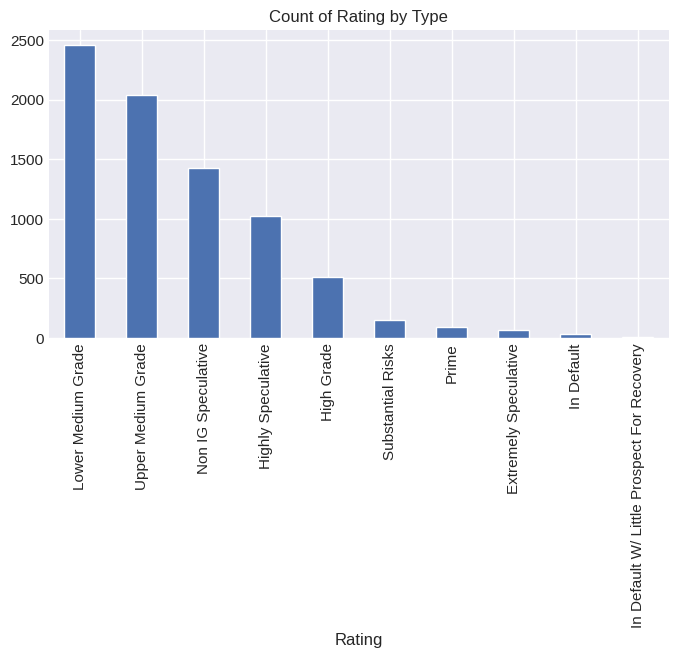

In [164]:
ax = df_ratingtype['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8, 4),
                                             title="Count of Rating by Type",
                                             grid=True)


In [165]:
plt.show()

In [166]:
df_ratingtype['Rating'].value_counts()

,count
Rating,
Lower Medium Grade,2461
Upper Medium Grade,2036
Non IG Speculative,1425
Highly Speculative,1020
High Grade,512
Substantial Risks,151
Prime,90
Extremely Speculative,65
In Default,34


## Data Segmentation by Rating Grade
As per the brief, we segment the dataset by ***Investment Grade*** and ***Speculative Grade***. We use Binary Rating where "1" implies Investment Grade and "0" implies Speculative Grade.
In the subsequnent two code blocks we count the occurences of the Binary Rating outcomes and replace binary values with corresponding grade labels.

In [167]:
# Segment data by Rating Grade
investment_grade = df_rating[df_rating['Binary Rating'] == 1]
speculative_grade = df_rating[df_rating['Binary Rating'] == 0]

# Count of each segment
print("Investment Grade Count:", len(investment_grade))
print("Speculative Grade Count:", len(speculative_grade))



Investment Grade Count: 5099
Speculative Grade Count: 2706


In [168]:
# Replace binary values with corresponding grade labels Using .replace() method to map binary values
df_rating['Binary Rating'] = df_rating['Binary Rating'].replace({1: 'Investment Grade', 0: 'Speculative Grade'})

df_rating.head()

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,Upper Medium Grade,30-07-2010,1056903,Investment Grade,4941,Utils,AWR,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,Prime,16-09-2010,8670,Investment Grade,7374,BusEq,ADP,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,Lower Medium Grade,23-11-2010,8858,Investment Grade,5065,Shops,AVT,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,High Grade,29-06-2010,1035201,Investment Grade,4941,Utils,CWT,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,Upper Medium Grade,14-07-2010,721371,Investment Grade,5122,Shops,CAH,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


## Data Segmentation by Rating Grade + Ratings
According to the brief, we combine the Rating Grade and individual Ratings, then count the outcomes.

In [169]:
# Group by 'Rating' and 'Binary Rating'
grouped = df_rating.groupby(['Rating', 'Binary Rating'])

# Example: Calculate the size of each group
group_sizes = grouped.size().reset_index(name='Group Size')

group_sizes


,Rating,Binary Rating,Group Size
0,Extremely Speculative,Speculative Grade,65
1,High Grade,Investment Grade,512
2,Highly Speculative,Speculative Grade,1020
3,In Default,Speculative Grade,34
4,In Default W/ Little Prospect For Recovery,Speculative Grade,11
5,Lower Medium Grade,Investment Grade,2461
6,Non IG Speculative,Speculative Grade,1425
7,Prime,Investment Grade,90
8,Substantial Risks,Speculative Grade,151
9,Upper Medium Grade,Investment Grade,2036


## Diversified Portfolio Selection Strategy

## As per the brief, we map the SIC codes on to industry sectors.

In [170]:
# Define the function to assign industry sectors
def assign_industry(sic_code):
    """
    Assigns an industry sector based on the provided SIC code.

    Parameters:
        sic_code (int): The SIC code to classify.

    Returns:
        str: The name of the industry sector.
    """
    if 1 <= sic_code <= 999:
        return "Agriculture"
    elif 1000 <= sic_code <= 1499:
        return "Mining"
    elif 1500 <= sic_code <= 1799:
        return "Construction"
    elif 2000 <= sic_code <= 3999:
        return "Manufacturing"
    elif 4000 <= sic_code <= 4899:
        return "Transportation"
    elif 4900 <= sic_code <= 4999:
        return "Utilities"
    elif 5000 <= sic_code <= 5199:
        return "Wholesale Trade"
    elif 5200 <= sic_code <= 5999:
        return "Retail Trade"
    elif 6000 <= sic_code <= 6799:
        return "Finance, Insurance, and Real Estate"
    elif 7000 <= sic_code <= 8999:
        return "Services"
    elif 9000 <= sic_code <= 9999:
        return "Public Administration"
    else:
        return "Unknown Sector"

# Apply the assign_industry function to the 'SIC Codes' column
industries = df_rating['SIC Code'].apply(assign_industry)

industries


,SIC Code
0,Utilities
1,Services
2,Wholesale Trade
3,Utilities
4,Wholesale Trade
...,...
7800,Services
7801,Services
7802,Transportation
7803,Transportation


### Gives us the frequency of dataset SIC codes

In [171]:
df_rating['SIC Code'].value_counts()

,count
SIC Code,
1311,387
4911,313
4931,279
2834,251
3674,197
...,...
100,1
3334,1
5063,1


###  We have added a new column named 'Industry_Sector' to the dataset, mapping each SIC code in the 'SIC Code' column to its corresponding industry sector.

In [172]:
# Define the function to assign industry sectors
def assign_industry(sic_code):
    """
    Assigns an industry sector based on the provided SIC code.

    Parameters:
        sic_code (int): The SIC code to classify.

    Returns:
        str: The name of the industry sector.
    """
    if 1 <= sic_code <= 999:
        return "Agriculture"
    elif 1000 <= sic_code <= 1499:
        return "Mining"
    elif 1500 <= sic_code <= 1799:
        return "Construction"
    elif 2000 <= sic_code <= 3999:
        return "Manufacturing"
    elif 4000 <= sic_code <= 4899:
        return "Transportation"
    elif 4900 <= sic_code <= 4999:
        return "Utilities"
    elif 5000 <= sic_code <= 5199:
        return "Wholesale Trade"
    elif 5200 <= sic_code <= 5999:
        return "Retail Trade"
    elif 6000 <= sic_code <= 6799:
        return "Finance, Insurance, and Real Estate"
    elif 7000 <= sic_code <= 8999:
        return "Services"
    elif 9000 <= sic_code <= 9999:
        return "Public Administration"
    else:
        return "Unknown Sector"

# Apply the assign_industry function to the 'SIC Code' column
df_rating['Industry_Sector'] = df_rating['SIC Code'].apply(assign_industry)

df_rating.head()


,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Industry_Sector
0,Standard & Poor's Ratings Services,American States Water Co.,Upper Medium Grade,30-07-2010,1056903,Investment Grade,4941,Utils,AWR,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333,Utilities
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,Prime,16-09-2010,8670,Investment Grade,7374,BusEq,ADP,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132,Services
2,Standard & Poor's Ratings Services,Avnet Inc.,Lower Medium Grade,23-11-2010,8858,Investment Grade,5065,Shops,AVT,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231,Wholesale Trade
3,Standard & Poor's Ratings Services,California Water Service Co.,High Grade,29-06-2010,1035201,Investment Grade,4941,Utils,CWT,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999,Utilities
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,Upper Medium Grade,14-07-2010,721371,Investment Grade,5122,Shops,CAH,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174,Wholesale Trade


## Distribution of Industry Sectors

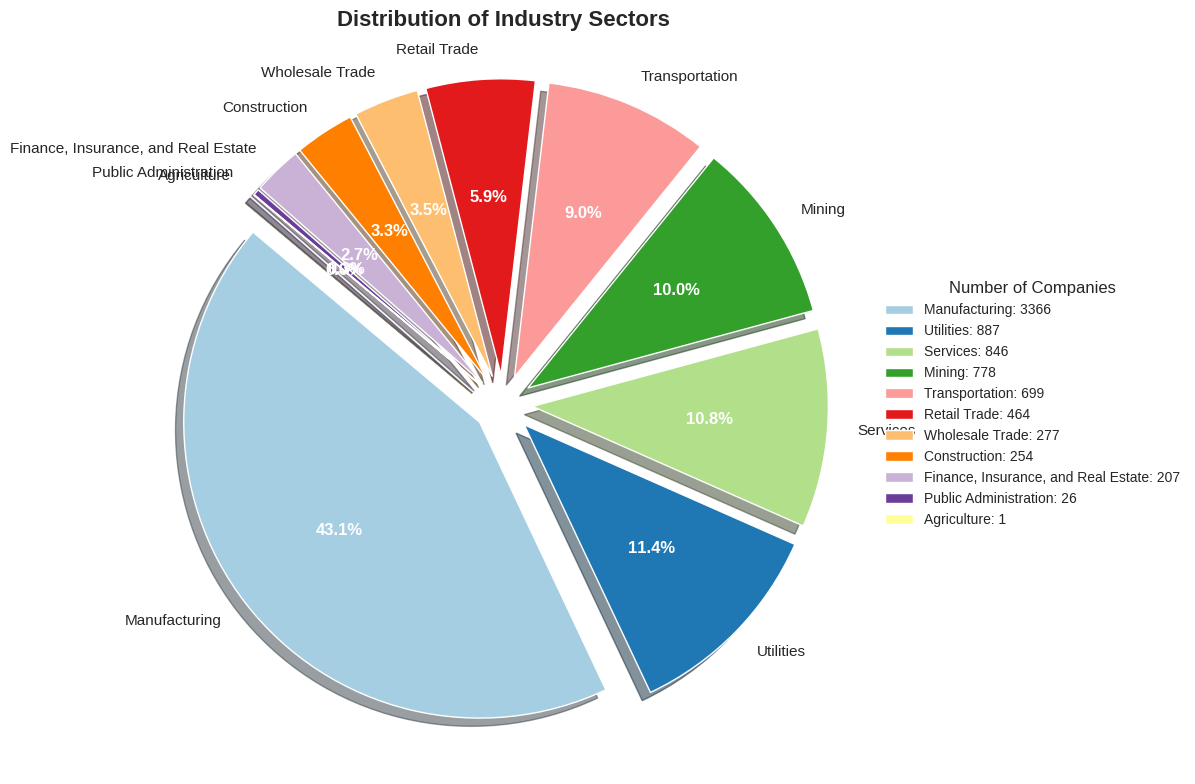

In [173]:
# Count the number of occurrences of each industry sector
industry_counts = df_rating['Industry_Sector'].value_counts()

# Create a pie chart with improved aesthetics
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors and explode parameters for better visual distinction
colors = plt.cm.Paired(range(len(industry_counts)))
explode = [0.1] * len(industry_counts)  # Slightly explode all slices for emphasis

wedges, texts, autotexts = ax.pie(
    industry_counts,
    labels=industry_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops=dict(edgecolor='white')  # Add white edges to wedges
)

# Customize the appearance of the percentages
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)  # Increase font size for better readability

# Add a legend with the number of companies, positioned beside the pie chart
ax.legend(
    title="Number of Companies",
    labels=[f'{label}: {count}' for label, count in zip(industry_counts.index, industry_counts)],
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

# Set title with enhanced styling
plt.title('Distribution of Industry Sectors', fontsize=16, fontweight='bold')

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()


### Industry Secrtor value count

In [174]:
df_rating.groupby('Industry_Sector').size()

,0
Industry_Sector,
Agriculture,1
Construction,254
"Finance, Insurance, and Real Estate",207
Manufacturing,3366
Mining,778
Public Administration,26
Retail Trade,464
Services,846
Transportation,699


## Descriptive Statistics, ratios of interest for Portfolio constructuon: ROE, ROTE

In [175]:
df_rating['ROE - Return On Equity'].describe()

,ROE - Return On Equity
count,7805.0000
mean,15.9505
std,230.5925
min,-11258.2100
25%,6.0228
50%,12.5000
75%,20.5157
max,7038.4610


In [176]:
df_rating['Return On Tangible Equity'].describe()

,Return On Tangible Equity
count,7805.0000
mean,21.4816
std,462.7341
min,-14023.2600
25%,-12.2339
50%,10.5641
75%,26.8941
max,9882.9790


In [177]:
df_rating.groupby('Rating').size()

,0
Rating,
Extremely Speculative,65
High Grade,512
Highly Speculative,1020
In Default,34
In Default W/ Little Prospect For Recovery,11
Lower Medium Grade,2461
Non IG Speculative,1425
Prime,90
Substantial Risks,151


In [178]:
df_rating['Return On Tangible Equity'].agg([len, 'min', 'max'])


,Return On Tangible Equity
len,7805.0000
min,-14023.2600
max,9882.9790


In [179]:
df_rating['ROE - Return On Equity'].agg([len, 'min', 'max'])

,ROE - Return On Equity
len,7805.0000
min,-11258.2100
max,7038.4610


## Descriptive Statisctics entire numerical dataset.

****Initial exploration reveals significant skewness, showing many outliers in the dataset.****


In [180]:
df_rating.describe()

,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
count,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000,7805.0000
mean,737161.5887,4052.5768,1.9263,0.4528,0.1773,42.4339,11.5316,11.5827,20.0715,8.6599,5.9956,0.8498,15.9505,21.4816,4.5757,7.0761,0.4798,0.1195
std,514354.1800,1870.8488,1.9217,2.6292,34.4563,23.7420,25.4690,25.4839,24.3804,27.8664,24.0556,0.6962,230.5925,462.7341,9.2299,24.3820,6.0506,7.2537
min,1750.0000,100.0000,0.1749,-86.3636,-1473.0980,-87.6840,-461.7878,-461.7878,-360.8169,-476.0100,-414.8248,0.0684,-11258.2100,-14023.2600,-226.4425,-745.4545,-91.3302,-130.6658
25%,93556.0000,2834.0000,1.0773,0.2865,0.4197,22.4539,6.0982,6.1811,11.1621,4.0087,2.6371,0.3995,6.0228,-12.2339,2.3919,3.6926,-0.4485,-0.7237
50%,879526.0000,3714.0000,1.4968,0.4272,0.7528,39.6354,12.1201,12.1558,18.3045,9.7051,6.9389,0.6612,12.5000,10.5641,4.7675,7.4408,0.2378,0.1335
75%,1091587.0000,4931.0000,2.1610,0.5422,1.2116,59.6417,19.4646,19.5399,30.6616,16.6769,12.3667,1.0388,20.5157,26.8941,7.8813,12.5151,1.0888,0.9978
max,1748790.0000,9997.0000,34.0768,171.5000,194.3750,100.0000,93.9930,93.9930,286.4935,221.2894,219.3903,8.5039,7038.4610,9882.9790,114.7169,466.6667,282.1921,107.7377


## Examining and visualize the Skewness in the numerical Data
Outliers contaminate the data, obscuring the true distribution. We'll use pandas' ***.skew()*** function to assess column normality, with values between 0 amd 1 indicating a symmetric distribution.

In [181]:
# Select only numeric columns
numeric_df = df_rating.select_dtypes(include=['number'])

# Calculate skewness for the numeric columns
skewness = numeric_df.skew()

print(skewness)



CIK                              -0.1592
SIC Code                          0.4781
Current Ratio                     7.2604
Long-term Debt / Capital         21.5952
Debt/Equity Ratio               -27.8798
Gross Margin                      0.3524
Operating Margin                 -9.7543
EBIT Margin                      -9.7394
EBITDA Margin                    -5.9037
Pre-Tax Profit Margin            -8.6554
Net Profit Margin                -8.6895
Asset Turnover                    2.7702
ROE - Return On Equity           -9.2819
Return On Tangible Equity         8.9506
ROA - Return On Assets           -5.2689
ROI - Return On Investment      -14.8271
Operating Cash Flow Per Share    13.5365
Free Cash Flow Per Share         -2.5472
dtype: float64


We observe that this is a generalized problem. Almost all columns are extremely skewed

### We conduct an analysis of the variations in industry sectors based on Return on Equity (ROE), a pivotal ratio employed in our securities selection process

We use the boxplot for visualization, as per the brief.

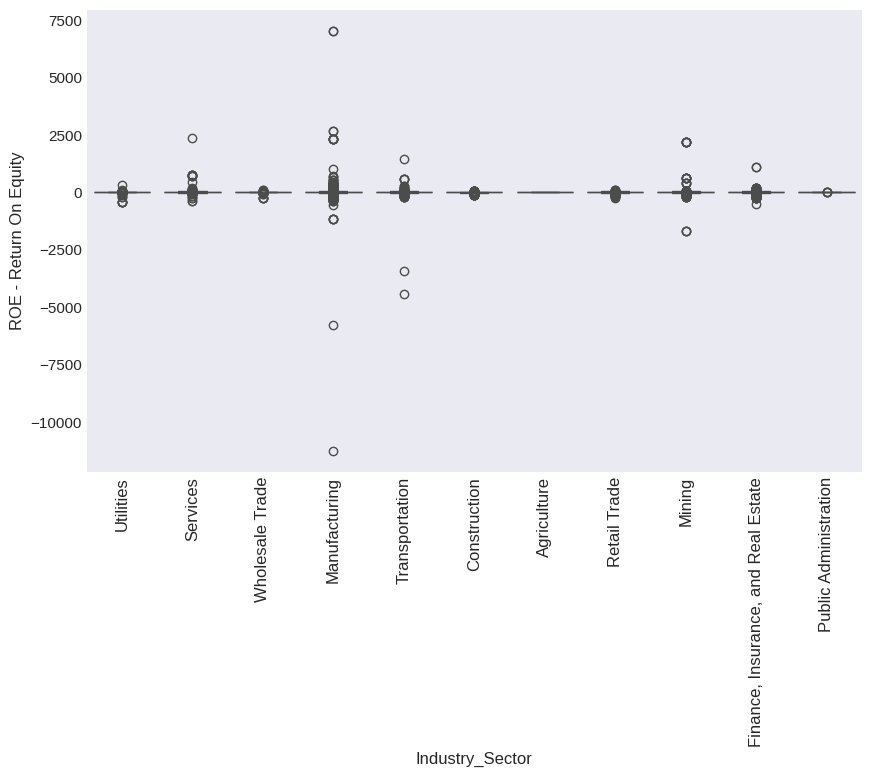

In [182]:
# set the figure size
plt.figure(figsize=(10, 6))
# plot the boxplot for categorical variable 'city'
# x: variable on x-axis
# y: variable in y-axis
# data: dataframe to be used
ax = sns.boxplot(x=df_rating["Industry_Sector"], y=df_rating['ROE - Return On Equity'], data=df_rating)

# set the x-axis labels
# rotation: rotate the the x-axis ticks by 90˚
# fontsize = 30: sets the font size to 12
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 12)

# display the plot
plt.show()

### This visualization helps us understand the significant variance in average ROE across different industry sectors, highlighting clear evidence of outliers in the datase.

In [183]:
df_rating.groupby(['Industry_Sector'])['ROE - Return On Equity'].agg([len, 'min', 'max','mean'])

,len,min,max,mean
Industry_Sector,,,,
Agriculture,1,8.5300,8.5300,8.5300
Construction,254,-121.3538,54.9788,2.6971
"Finance, Insurance, and Real Estate",207,-529.8164,1121.6380,7.6206
Manufacturing,3366,-11258.2100,7038.4610,21.9219
Mining,778,-1681.2370,2200.7520,19.0527
Public Administration,26,-5.0978,26.3167,19.1250
Retail Trade,464,-248.1002,109.3749,9.9145
Services,846,-364.8990,2345.0200,20.2471
Transportation,699,-4418.8890,1461.7430,4.4264


From the simple statistical analysis, we observe significant noise in the data. Additional feature analysis is required.

## An effective method to filter out outliers is by utilizing the Interquartile Range (IQR).



In [184]:
df = df_rating

def remove_outliers_iqr(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    filtered_df = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return filtered_df

cleaned_df = remove_outliers_iqr(df)
cleaned_df.describe()



,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
count,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000,3673.0000
mean,687581.0947,4078.7362,1.6287,0.3887,0.8220,42.5107,13.8379,13.8629,21.6213,11.3847,8.1081,0.7089,12.7734,10.6115,4.9549,7.7238,0.2295,0.0683
std,517079.2522,1654.2289,0.7462,0.1498,0.4871,21.4505,8.2774,8.2852,11.3151,8.0218,6.0059,0.4041,8.8504,27.2329,3.5670,5.6145,1.1359,1.2310
min,1750.0000,1000.0000,0.2081,0.0004,0.0007,2.1188,-11.1757,-11.1757,-2.0463,-10.8406,-10.6840,0.0684,-14.4315,-69.7422,-5.1947,-8.5344,-2.7379,-3.2953
25%,78239.0000,2860.0000,1.0244,0.2844,0.4637,24.9985,7.5472,7.5472,12.7520,5.7729,4.1924,0.3941,7.4918,-3.2471,2.5757,4.1248,-0.3400,-0.6301
50%,842162.0000,3823.0000,1.5169,0.4052,0.7497,39.7620,12.9624,12.9624,19.2400,10.3598,7.4338,0.6270,11.8932,11.9066,4.4053,6.9029,0.2019,0.0782
75%,1064728.0000,4931.0000,2.1054,0.4931,1.0891,59.2479,19.1988,19.2632,29.7112,16.6042,11.9053,0.9201,17.9075,24.6797,7.1188,11.1056,0.8541,0.7529
max,1748790.0000,8071.0000,3.7663,0.6985,2.3645,100.0000,38.4811,38.4811,59.1813,35.5696,26.8837,1.9940,41.6488,85.5783,16.0508,25.0243,3.3700,3.5302


In [185]:
cleaned_df.skew(axis=0)

,0
CIK,-0.0416
SIC Code,0.4315
Current Ratio,0.6714
Long-term Debt / Capital,-0.3282
Debt/Equity Ratio,0.8770
Gross Margin,0.4008
Operating Margin,0.3426
EBIT Margin,0.3401
EBITDA Margin,0.6177
Pre-Tax Profit Margin,0.3605


We revisit ***.skew()*** to confirm the normalization of the data following the IRQ filtering methodology

### The following histogram and code (shape), (Min Max), confirm the reduction of data dimension, ensuring the removal of outliers

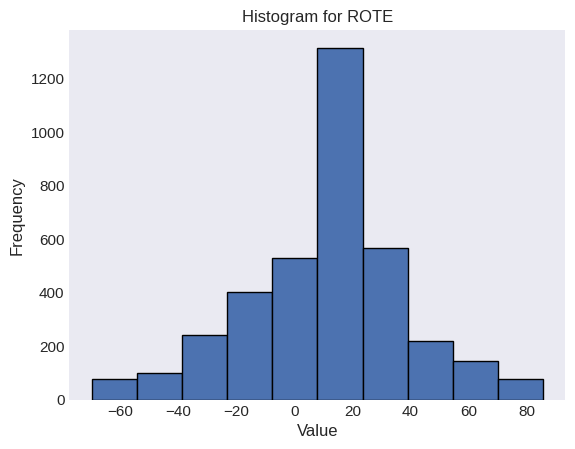

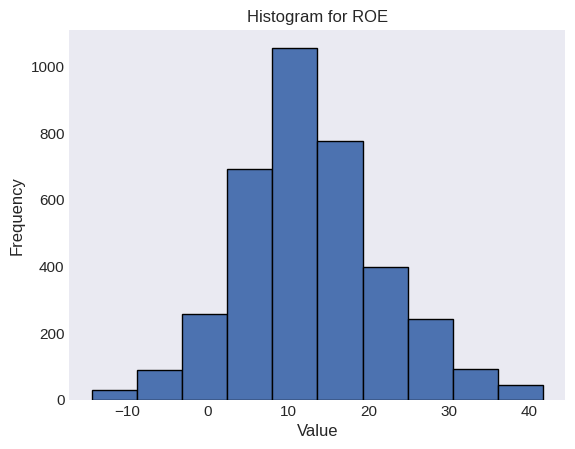

In [186]:
# Define datasets
datasets = {
    'ROTE': cleaned_df['Return On Tangible Equity'],
    'ROE':cleaned_df['ROE - Return On Equity']
}

# Loop through the datasets and create histograms
for name, data in datasets.items():
    plt.figure()  # Create a new figure for each dataset
    plt.hist(data, bins=10, edgecolor='black')
    plt.title(f'Histogram for {name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


Visualization of the distribution in the numerical columns. (***univariate analysis on the numerical variables***)

In [187]:
# Verify the removal of outliers
cleaned_df.shape

(3673, 18)

In [188]:
cleaned_df['Return On Tangible Equity'].agg([len, 'min', 'max'])

,Return On Tangible Equity
len,3673.0000
min,-69.7422
max,85.5783


## Operating cash flow, ROE and ROTE
A company should ideally have both a high ***Return on Equity (ROE)*** and healthy ***Operating Cash Flow per Share (OCFPS)***, indicating strong profitability and solid cash generation. Conversely, a ***negative correlation*** may suggest that profits are derived from accounting adjustments rather than actual cash earnings, raising concerns about financial stability. For example, a company might engage in aggressive debt financing to boost its ROE by leveraging its assets and increasing the return on equity. However, this strategy can lead to higher interest expenses, which can reduce OCFPS.

## Scatter plots enable us to visualize the relationships among ROTE, ROE, and Operating Cash flow per Share within the dataset.

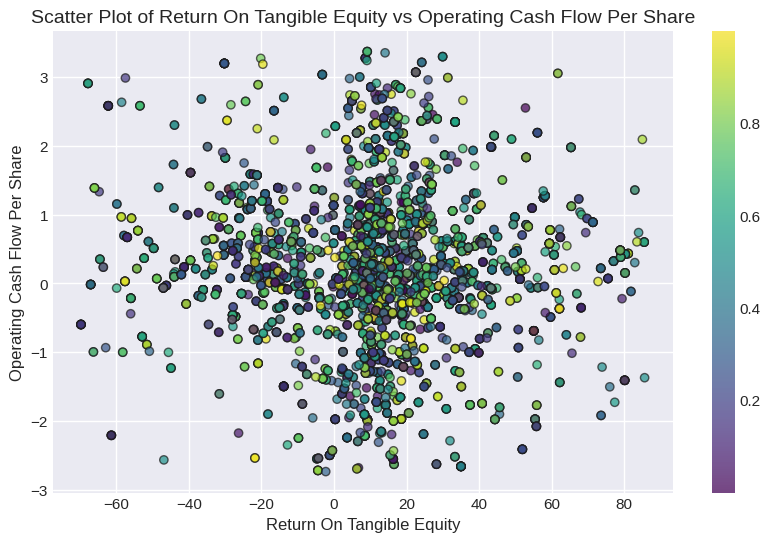

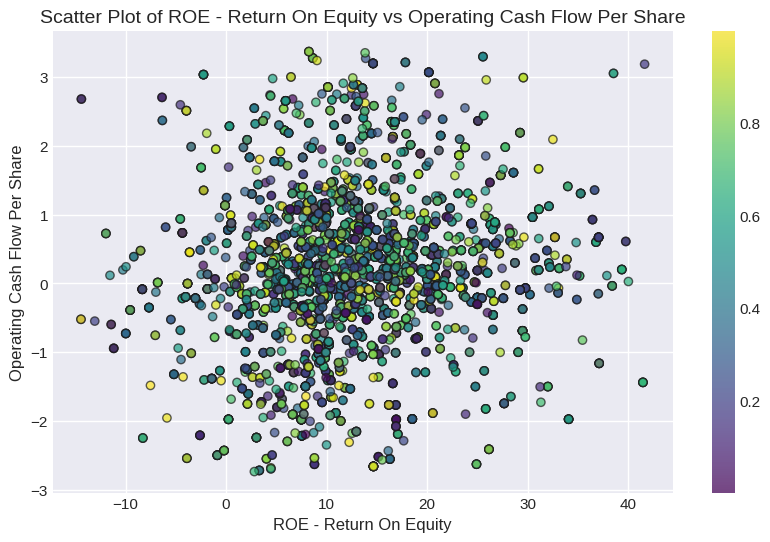

In [189]:
# Define the data pairs and their respective labels
data_pairs = [
    ('Return On Tangible Equity', 'Operating Cash Flow Per Share'),
    ('ROE - Return On Equity', 'Operating Cash Flow Per Share')
]

for x_col, y_col in data_pairs:
    x = cleaned_df[x_col]
    y = cleaned_df[y_col]
    colors = np.random.rand(len(x))  # Random colors for each point

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.7, edgecolor='k')
    plt.colorbar(scatter)

    # Add title and labels with descriptive text
    plt.title(f'Scatter Plot of {x_col} vs {y_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()


**Comparative Analysis Across Data Segments**

### ROTE focuses on profitability and the efficiency of using tangible assets, while OCFPS emphasizes cash generation from core operations

While there isn't a direct mathematical correlation between ***ROTE and OCFPS***, they are both important metrics that investors use to evaluate a company's financial performance and efficiency. A company with consistently ***high ROTE and strong OCFPS*** over time would generally be viewed favorably by investors, as it demonstrates both profitability and cash generation ability.

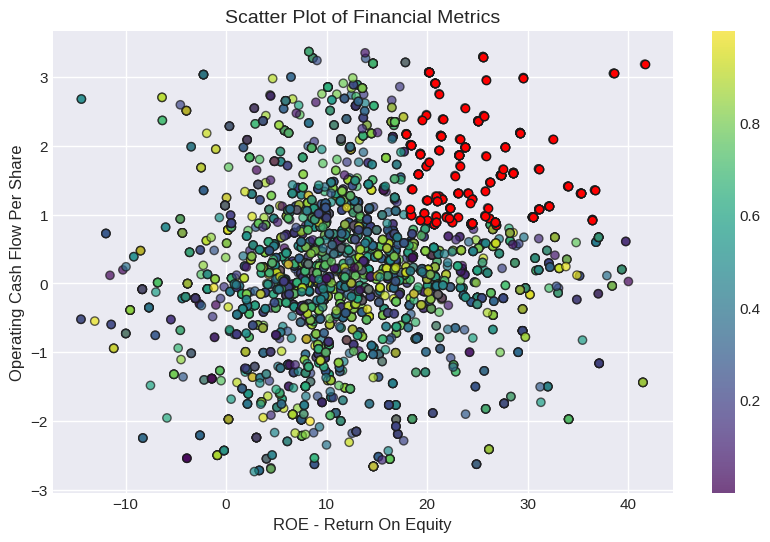

In [190]:
x = cleaned_df['ROE - Return On Equity']
y = cleaned_df['Operating Cash Flow Per Share']
colors = np.random.rand(len(x))  # Random colors for each point

# Determine the threshold for the 75th percentile
x_threshold = np.percentile(x, 75)
y_threshold = np.percentile(y, 75)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(scatter)
plt.title('Scatter Plot of Financial Metrics', fontsize=14)
plt.xlabel('ROE - Return On Equity', fontsize=12)
plt.ylabel('Operating Cash Flow Per Share', fontsize=12)
plt.grid(True)

# Highlight the 75th percentile
highlight = (x > x_threshold) & (y > y_threshold)
plt.scatter(x[highlight], y[highlight], color='red', edgecolor='k')
plt.legend()

plt.show()


## Industry comparison is key, growth is important for ROE and OCFPS.
Both metrics are crucial for assessing a company's long-term sustainability and its ability to create value.  A company with ***consistently high OCFPS and ROE*** is likely to be more financially stable and better positioned to invest in growth initiatives, pay dividends, and reduce debt. It's important to note that a ***negative correlation between ROE and OCFPS*** is not always a cause for concern. Companies operating in highly cyclical industries, such as commodities or certain consumer goods, may experience a negative correlation during economic downturns or industry-specific cycles, companies might see their ROE decline as profits decrease, but their OCFPS might remain relatively stable or even increase due to cost-cutting measures and efficient cash management. Simiarly with Capital-Intensive Industries. It is essential to compare this metric with industry peers. The focus should be on the level of improvement and direction of progress, as these trends can reveal alpha opportunities. For illustrative purpose the 75th percentile datapoints are highlihted in red, to reflect the correlation sweet spot.

## Check overall varible Correlation.
#### Filtered numeric variables from the dataframe that are merely descriptive codes.

In [191]:
# Excludes 'SIC'  columns from the correlation calculation
df_corr = cleaned_df.drop(columns=['SIC Code']).corr()

df_corr.columns


Index(['CIK', 'Current Ratio', 'Long-term Debt / Capital', 'Debt/Equity Ratio',
       'Gross Margin', 'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share'],
      dtype='object')

In [192]:
# generate the correlation matrix
corr =  df_corr.corr()

# print the correlation matrix
corr

,CIK,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
CIK,1.0000,-0.2516,0.4264,0.4060,-0.0126,-0.2720,-0.2739,-0.0526,-0.4096,-0.4577,-0.2597,-0.7153,-0.5186,-0.7220,-0.7288,-0.1326,-0.0938
Current Ratio,-0.2516,1.0000,-0.5717,-0.5646,-0.5770,-0.4897,-0.4884,-0.6130,-0.3436,-0.2846,0.6569,0.0166,0.3856,0.2255,0.2013,-0.0713,-0.0641
Long-term Debt / Capital,0.4264,-0.5717,1.0000,0.9956,-0.0206,-0.1402,-0.1421,0.0282,-0.3233,-0.3590,-0.3608,-0.4193,-0.6325,-0.6969,-0.6800,-0.0964,-0.0705
Debt/Equity Ratio,0.4060,-0.5646,0.9956,1.0000,-0.0556,-0.1594,-0.1612,-0.0042,-0.3343,-0.3650,-0.3164,-0.3766,-0.5983,-0.6648,-0.6445,-0.1199,-0.0922
Gross Margin,-0.0126,-0.5770,-0.0206,-0.0556,1.0000,0.8252,0.8249,0.9142,0.7435,0.6964,-0.8555,0.0636,-0.1192,0.0992,0.0741,-0.0253,-0.0245
Operating Margin,-0.2720,-0.4897,-0.1402,-0.1594,0.8252,1.0000,1.0000,0.9491,0.9744,0.9496,-0.7238,0.4632,0.0687,0.4707,0.4386,-0.0295,-0.0734
EBIT Margin,-0.2739,-0.4884,-0.1421,-0.1612,0.8249,1.0000,1.0000,0.9485,0.9749,0.9503,-0.7224,0.4649,0.0715,0.4727,0.4407,-0.0302,-0.0740
EBITDA Margin,-0.0526,-0.6130,0.0282,-0.0042,0.9142,0.9491,0.9485,1.0000,0.8643,0.8176,-0.8836,0.1918,-0.0960,0.1960,0.1631,-0.0354,-0.0617
Pre-Tax Profit Margin,-0.4096,-0.3436,-0.3233,-0.3343,0.7435,0.9744,0.9749,0.8643,1.0000,0.9920,-0.5651,0.6089,0.2232,0.6475,0.6171,-0.0222,-0.0711
Net Profit Margin,-0.4577,-0.2846,-0.3590,-0.3650,0.6964,0.9496,0.9503,0.8176,0.9920,1.0000,-0.5082,0.6569,0.2704,0.6984,0.6675,-0.0370,-0.0822


##  We generate a heatmap of the correlation matrix for visualization

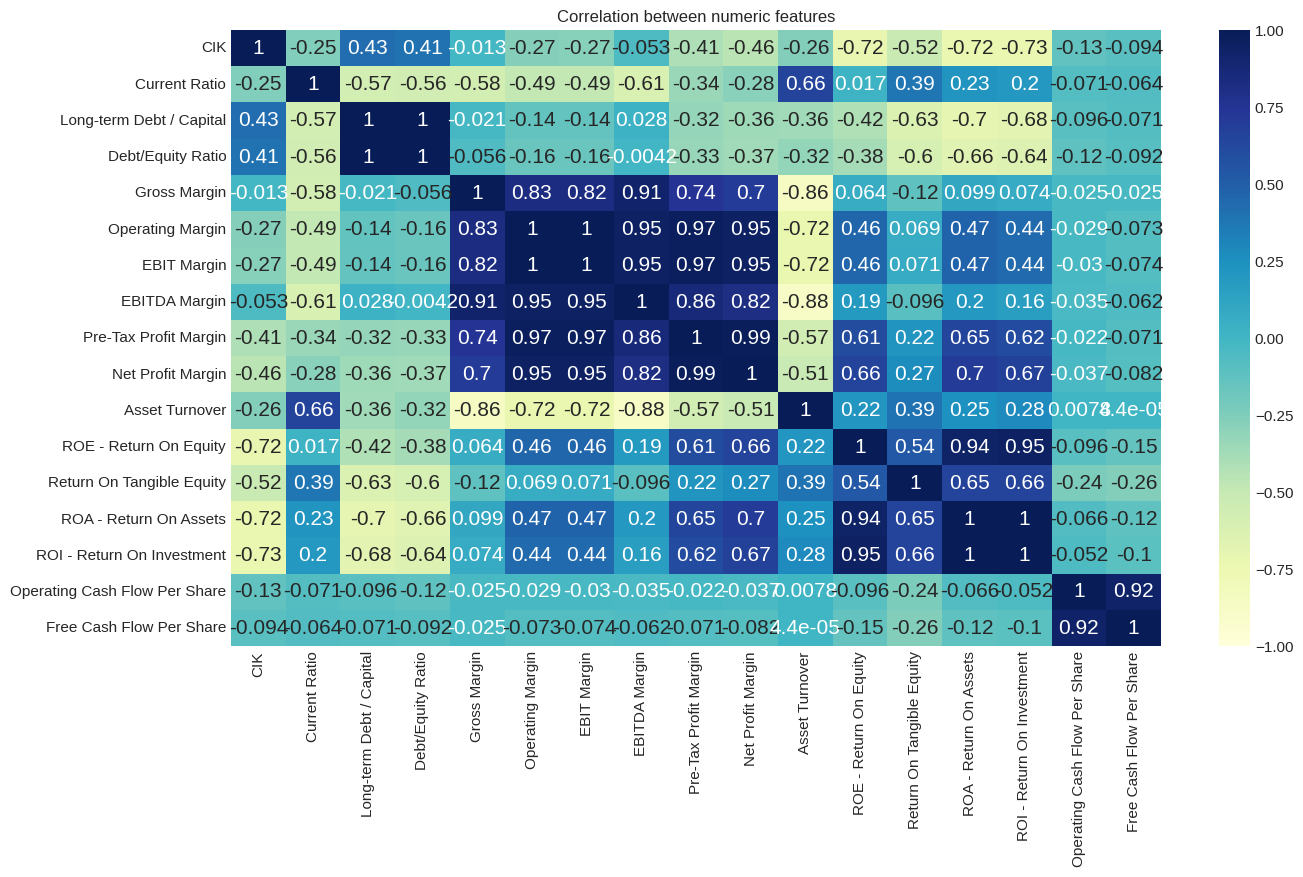

In [193]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15})

# specify name of the plot
plt.title('Correlation between numeric features')

# display the plot
plt.show()

#### Columns Correlation
It is clear that the numeric variables ***(financial ratios)*** exhibit correlation even after removing outliers, since none of the correlation coefficients are zero, this suggests a degree of multicollinearity in the data.




### Analyis of Categorical Variables


In [194]:
# display the summary statistics of categorical variables
# include=objec: selects the categoric features
df_rating.describe(include = object)

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector
count,7805,7805,7805,7805,7805,7805,7805,7805
unique,7,1377,10,1414,2,12,678,11
top,Egan-Jones Ratings Company,"Mondelez International, Inc.",Lower Medium Grade,15-06-2012,Investment Grade,Other,DTE,Manufacturing
freq,2826,23,2461,417,5099,1251,42,3366


### There are 7 categorical variables.
From the output, we see that the variables 'Corporation', 'Sector', 'Ticker', and 'Rating Date' do not offer valuable information in the securities selection process at this stage. **Let's visualize the variables that are relevant.**

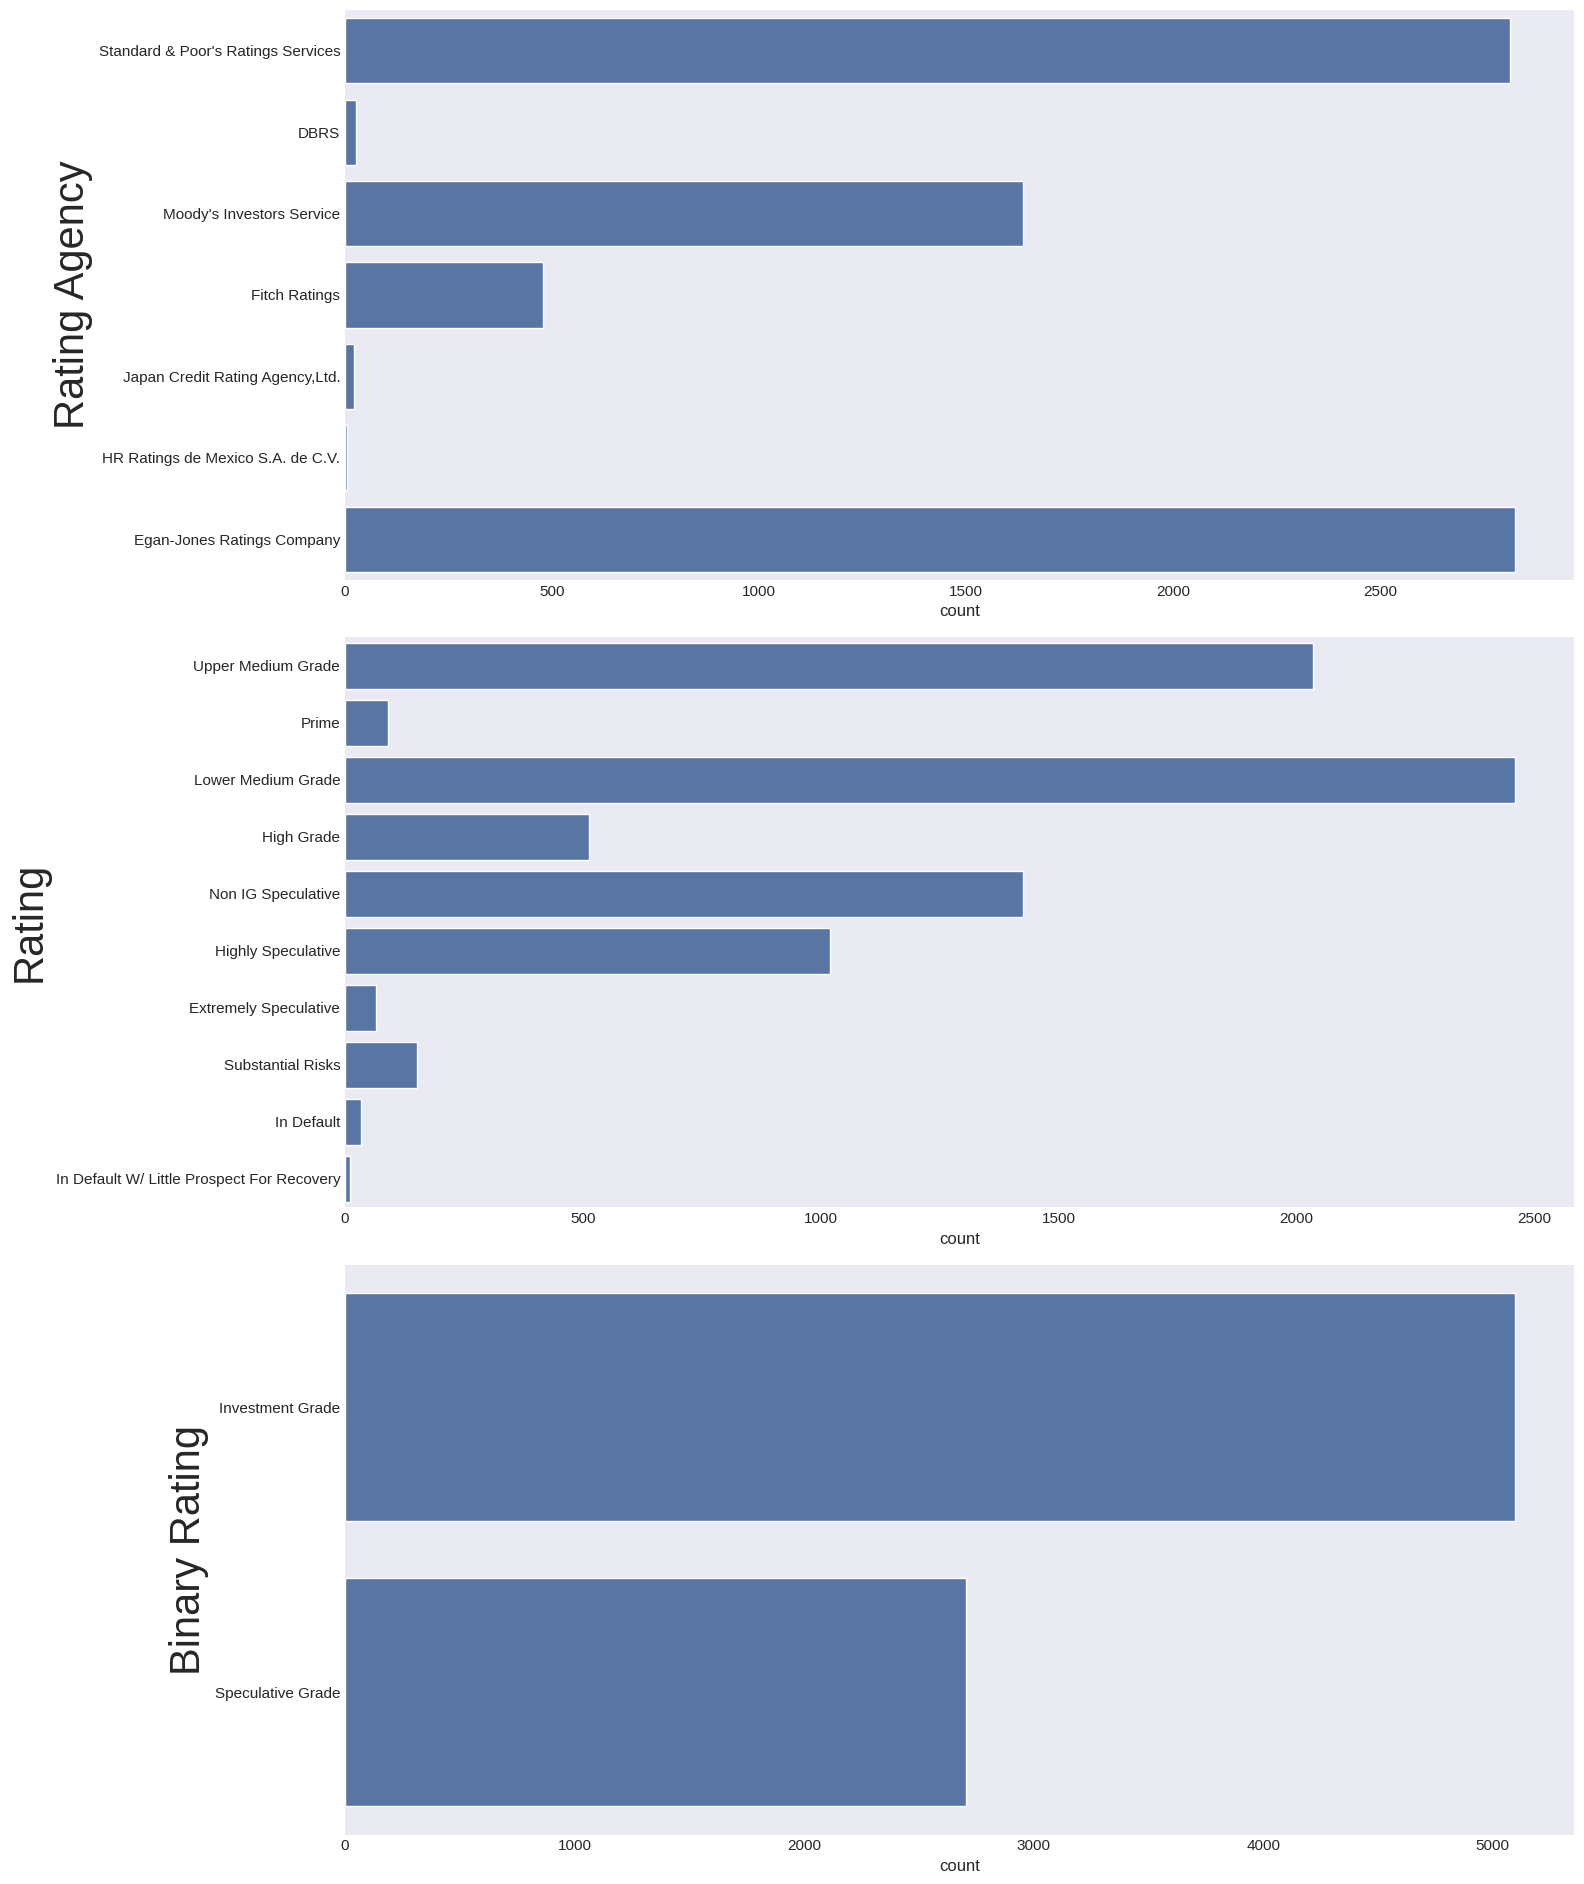

In [195]:
# create a list of all categorical variables
# include=object: selects the categoric features
# drop(['city'],axis=1): drops the city column from the dataframe
df_categoric_features = df_rating.select_dtypes(include='object').drop(['Ticker','Rating Date','Corporation','Sector'], axis=1)

# plot the count distribution for each categorical variable
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 1, figsize=(16, 19))

# # plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):

#     # plot the count plot using countplot()
#     # y: data on y axis
#     # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(y=df_rating[variable], ax=subplot )

#     # set the y-axis labels
#     # fontsize = 30: sets the font size to 30
    countplot.set_ylabel(variable, fontsize = 30)

# # avoid overlapping of the plots using tight_layout()
plt.tight_layout()

# # display the plot
plt.show()

In [196]:
df_ratingtype['Rating'].value_counts()

,count
Rating,
Lower Medium Grade,2461
Upper Medium Grade,2036
Non IG Speculative,1425
Highly Speculative,1020
High Grade,512
Substantial Risks,151
Prime,90
Extremely Speculative,65
In Default,34


## From the above plot we see that:


#### Egan-Jones Ratings Company provides a significant number of ratings. Its reputation for being primarily investor-supported, designed to minimize potential conflicts of interest in assessing credit quality, is a valuable factor in the selection process

#### There is a robust representation in the Lower Medium Grade Ratings selection, which is important in capturing risk alpha


#### Manufacturing companies represent the highest count in the dataset. While not a significant sector from a macroeconomic asset allocation perspective, the dataset provides a rich set for exploration

### An overview of the numerical Variables

In [197]:
cleaned_df.head()


,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,1056903,4941,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,8670,7374,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
3,1035201,4941,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
6,17843,3312,3.7607,0.3116,0.4527,12.0808,0.9761,0.9761,5.9069,0.3921,0.1585,0.7571,0.3662,0.4034,0.1326,0.2521,-0.6973,0.9587
7,1170858,4941,0.8134,0.3452,0.6231,54.2938,31.8143,31.8143,40.1446,28.7928,20.4126,0.3121,13.0426,15.2863,6.3671,8.5405,1.5316,0.1005


### Combine numerical and categorical variables

In [198]:
# Extract categorical features from df_rating
categorical_features = df_rating.select_dtypes(include=['object'])



In [199]:
combined_df = pd.merge(categorical_features, cleaned_df, left_index=True, right_index=True, how='inner')
combined_df

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,Upper Medium Grade,30-07-2010,Investment Grade,Utils,AWR,Utilities,1056903,4941,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,Prime,16-09-2010,Investment Grade,BusEq,ADP,Services,8670,7374,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
3,Standard & Poor's Ratings Services,California Water Service Co.,High Grade,29-06-2010,Investment Grade,Utils,CWT,Utilities,1035201,4941,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
6,Standard & Poor's Ratings Services,Carpenter Technology Corp.,Lower Medium Grade,20-12-2010,Investment Grade,Manuf,CRS,Manufacturing,17843,3312,3.7607,0.3116,0.4527,12.0808,0.9761,0.9761,5.9069,0.3921,0.1585,0.7571,0.3662,0.4034,0.1326,0.2521,-0.6973,0.9587
7,Standard & Poor's Ratings Services,Companhia de Saneamento Basico do Estado de Sa...,Non IG Speculative,07-12-2010,Speculative Grade,Utils,SBS,Utilities,1170858,4941,0.8134,0.3452,0.6231,54.2938,31.8143,31.8143,40.1446,28.7928,20.4126,0.3121,13.0426,15.2863,6.3671,8.5405,1.5316,0.1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,Moody's Investors Service,Xcel Energy Inc.,Upper Medium Grade,03-03-2016,Investment Grade,Utils,XEL,Utilities,72903,4931,0.8277,0.5296,1.2509,51.9347,16.6704,16.6704,26.4728,13.2218,8.7395,0.3162,9.9986,9.9986,2.7634,4.7034,0.0713,0.4874
7783,Standard & Poor's Ratings Services,Xcel Energy Inc.,Upper Medium Grade,13-05-2016,Investment Grade,Utils,XEL,Utilities,72903,4931,0.8277,0.5296,1.2509,51.9347,16.6704,16.6704,26.4728,13.2218,8.7395,0.3162,9.9986,9.9986,2.7634,4.7034,0.0713,0.4874
7802,Standard & Poor's Ratings Services,iHeartCommunications Inc.,In Default,08-03-2016,Speculative Grade,Telcm,CCU,Transportation,739708,4832,1.7606,0.1034,0.1523,54.2787,14.2454,14.2454,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552
7803,Standard & Poor's Ratings Services,iHeartCommunications Inc.,Extremely Speculative,24-03-2016,Speculative Grade,Telcm,CCU,Transportation,739708,4832,1.7606,0.1034,0.1523,54.2787,14.2454,14.2454,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552


### Check for NaN (Not a Number) values when merging datasets, particularly in large ones, to maintain data integrity

In [200]:
# Check the number of NaNs in each column
nan_counts = combined_df.isna().sum()

print(nan_counts)

Rating Agency                    0
Corporation                      0
Rating                           0
Rating Date                      0
Binary Rating                    0
                                ..
Return On Tangible Equity        0
ROA - Return On Assets           0
ROI - Return On Investment       0
Operating Cash Flow Per Share    0
Free Cash Flow Per Share         0
Length: 26, dtype: int64


### confirm data dimension

In [201]:
cleaned_df.shape

(3673, 18)

In [202]:
df_rating.shape

(7805, 26)

### we review the combined dataframe to ensure outliers have been removed

In [203]:
# Compare the number of rows
rows_diff = df_rating.shape[0] - cleaned_df.shape[0]

# Compare the number of columns
columns_diff = df_rating.shape[1] - cleaned_df.shape[1]

print(f"Difference in number of rows: {rows_diff}")
print(f"Difference in number of columns: {columns_diff}")

Difference in number of rows: 4132
Difference in number of columns: 8


In [204]:
combined_df_cleaned = combined_df
combined_df_cleaned.head()


,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,Upper Medium Grade,30-07-2010,Investment Grade,Utils,AWR,Utilities,1056903,4941,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,Prime,16-09-2010,Investment Grade,BusEq,ADP,Services,8670,7374,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
3,Standard & Poor's Ratings Services,California Water Service Co.,High Grade,29-06-2010,Investment Grade,Utils,CWT,Utilities,1035201,4941,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
6,Standard & Poor's Ratings Services,Carpenter Technology Corp.,Lower Medium Grade,20-12-2010,Investment Grade,Manuf,CRS,Manufacturing,17843,3312,3.7607,0.3116,0.4527,12.0808,0.9761,0.9761,5.9069,0.3921,0.1585,0.7571,0.3662,0.4034,0.1326,0.2521,-0.6973,0.9587
7,Standard & Poor's Ratings Services,Companhia de Saneamento Basico do Estado de Sa...,Non IG Speculative,07-12-2010,Speculative Grade,Utils,SBS,Utilities,1170858,4941,0.8134,0.3452,0.6231,54.2938,31.8143,31.8143,40.1446,28.7928,20.4126,0.3121,13.0426,15.2863,6.3671,8.5405,1.5316,0.1005


### Dataframe dimesion review

In [205]:
combined_df_cleaned.shape

(3673, 26)

In [206]:
combined_df_cleaned.groupby('Corporation').size()

,0
Corporation,
3M COMPANY,8
3M Co.,1
3M Company,3
AAR CORP.,2
ABB LTD,10
...,...
Xylem Inc.,1
Zoetis Inc.,3
eBay Inc.,2


WE conclude dataset was succesfully combined.

## Feature Engineering

**Portfolio Composition / Securities Selection**

Based on the thesis that an asset's return will approximate its Return on Equity (***ROE***), the dataframe was filtered to include all industry sectors with ***ROE***, except for Finance, Insurance, and Real Estate. These sectors were screened using Return on Tangible Equity (***ROTE***).

In [207]:
# Exclude rows with 'Finance', 'Insurance', and 'Real Estate' in 'Industry_Sector'
excluded_sector = ['Finance, Insurance, and Real Estate']
filtered_df = combined_df_cleaned[~combined_df_cleaned['Industry_Sector'].isin(excluded_sector)]




First, examination of the combined dataset (including both numerical and categorical variables) that has been screened for ***ROE*** and sorted in descending order.

In [208]:
# Sort the DataFrame by 'ROE - Return On Equity'
filtered_df.sort_values(by='ROE - Return On Equity', ascending=False)

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
7488,Moody's Investors Service,"Omnicom Group, Inc.",Lower Medium Grade,28-03-2016,Investment Grade,Other,OMC,Services,29989,7311,0.8425,0.5523,1.5819,17.4635,12.6870,12.6870,14.5496,11.7520,7.1460,0.6845,41.6488,-19.6256,5.4426,18.6470,3.1868,3.1945
1371,Standard & Poor's Ratings Services,United Parcel Service Inc.,High Grade,17-02-2012,Investment Grade,Other,UPS,Transportation,1090727,4210,1.9602,0.5659,1.3478,78.3167,11.3856,11.3856,15.0025,10.6772,6.7373,1.4747,41.4813,62.1949,9.9354,18.0063,-1.4404,-0.9863
1374,Moody's Investors Service,"United Parcel Service, Inc.",High Grade,15-06-2012,Investment Grade,Other,UPS,Transportation,1090727,4210,1.9602,0.5659,1.3478,78.3167,11.3856,11.3856,15.0025,10.6772,6.7373,1.4747,41.4813,62.1949,9.9354,18.0063,-1.4404,-0.9863
1372,Standard & Poor's Ratings Services,United Parcel Service Inc.,High Grade,28-08-2012,Investment Grade,Other,UPS,Transportation,1090727,4210,1.9602,0.5659,1.3478,78.3167,11.3856,11.3856,15.0025,10.6772,6.7373,1.4747,41.4813,62.1949,9.9354,18.0063,-1.4404,-0.9863
1373,Standard & Poor's Ratings Services,United Parcel Service Inc.,High Grade,21-09-2012,Investment Grade,Other,UPS,Transportation,1090727,4210,1.9602,0.5659,1.3478,78.3167,11.3856,11.3856,15.0025,10.6772,6.7373,1.4747,41.4813,62.1949,9.9354,18.0063,-1.4404,-0.9863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7340,Standard & Poor's Ratings Services,Kratos Defense & Security Solutions Inc.,Highly Speculative,30-03-2016,Speculative Grade,BusEq,KTOS,Services,1069258,7370,1.8585,0.6360,1.7510,24.6234,-0.6848,-0.6848,3.6524,-6.7874,3.0132,0.7274,-13.0606,12.4953,-3.6754,-4.7544,-0.5494,-0.5405
5243,Standard & Poor's Ratings Services,Calumet Specialty Products Partners LP,Highly Speculative,24-03-2015,Speculative Grade,Enrgy,CLMT,Manufacturing,1340122,2911,1.6637,0.6744,2.0721,9.1468,0.8081,0.8081,3.6245,-1.9513,-2.1654,1.8771,-14.3920,-36.5591,-3.6368,-4.5089,2.6798,0.8871
5244,Standard & Poor's Ratings Services,Calumet Specialty Products Partners LP,Highly Speculative,06-05-2015,Speculative Grade,Enrgy,CLMT,Manufacturing,1340122,2911,1.6637,0.6744,2.0721,9.1468,0.8081,0.8081,3.6245,-1.9513,-2.1654,1.8771,-14.3920,-36.5591,-3.6368,-4.5089,2.6798,0.8871
7634,Standard & Poor's Ratings Services,"SunCoke Energy, Inc.",Substantial Risks,01-11-2016,Speculative Grade,Manuf,SXC,Manufacturing,1514705,3312,1.7365,0.4731,0.8981,19.3443,-4.1495,-4.1495,2.9193,-8.3522,-8.3854,0.7674,-14.4315,-14.8961,-5.1947,-7.6033,-0.5230,-0.2687


****Dataset reveals duplicate corporate listings due to multiple ratings from different agencies.****

### The number of unique companies in the dataset was counted, and duplicates were excluded from the portfolio screen.

In [209]:
unique_companies_count = filtered_df['Ticker'].nunique()
print(f"Number of unique companies: {unique_companies_count}")


Number of unique companies: 419


In [210]:
filtered_df_unique = filtered_df.drop_duplicates(subset=['Ticker'])


In [211]:
filtered_df_unique

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,Upper Medium Grade,30-07-2010,Investment Grade,Utils,AWR,Utilities,1056903,4941,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,Prime,16-09-2010,Investment Grade,BusEq,ADP,Services,8670,7374,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
3,Standard & Poor's Ratings Services,California Water Service Co.,High Grade,29-06-2010,Investment Grade,Utils,CWT,Utilities,1035201,4941,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
6,Standard & Poor's Ratings Services,Carpenter Technology Corp.,Lower Medium Grade,20-12-2010,Investment Grade,Manuf,CRS,Manufacturing,17843,3312,3.7607,0.3116,0.4527,12.0808,0.9761,0.9761,5.9069,0.3921,0.1585,0.7571,0.3662,0.4034,0.1326,0.2521,-0.6973,0.9587
7,Standard & Poor's Ratings Services,Companhia de Saneamento Basico do Estado de Sa...,Non IG Speculative,07-12-2010,Speculative Grade,Utils,SBS,Utilities,1170858,4941,0.8134,0.3452,0.6231,54.2938,31.8143,31.8143,40.1446,28.7928,20.4126,0.3121,13.0426,15.2863,6.3671,8.5405,1.5316,0.1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,Standard & Poor's Ratings Services,Southern Copper Corp.,Lower Medium Grade,17-10-2016,Investment Grade,Other,SCCO,Mining,1001838,1000,2.6996,0.5290,1.1231,41.9806,28.0307,28.0307,38.1518,23.5677,14.5940,0.4007,13.9851,14.4068,5.8849,6.5871,-0.5301,-0.1295
7637,Standard & Poor's Ratings Services,TAL International Group Inc.,Lower Medium Grade,01-08-2016,Investment Grade,Other,TAL,Services,1331745,7359,1.3463,0.3408,0.5169,51.0226,13.7192,13.7192,16.8135,22.0828,16.5947,0.5841,23.3146,30.3545,9.6814,15.3697,0.0411,0.0402
7639,Standard & Poor's Ratings Services,TMS International Corporation,Highly Speculative,23-09-2016,Speculative Grade,Shops,TMS,Wholesale Trade,1491501,5051,2.0305,0.2608,0.5907,42.7402,1.5099,1.5099,4.6166,-2.8121,-5.1685,0.8360,-11.5454,-13.9077,-4.3182,-8.5344,0.1162,0.1381
7700,Standard & Poor's Ratings Services,"Townsquare Media, Inc.",Highly Speculative,23-02-2016,Speculative Grade,Telcm,TSQ,Transportation,1499832,4832,1.6624,0.6183,1.6202,27.9753,19.2035,19.2035,23.4809,4.1181,2.3222,0.4160,2.8192,-2.2897,0.9660,1.0762,-2.7379,-1.5155


We utilized the Ticker column to identify and exclude duplicate listings, due to the fact that ratings agencies' names for similar companies differ

### The dataframe was filtered to highlight ***ROE*** with a minimum positive ***Operating Cash Flow (OCF)***

In [212]:
filtered_df_ROE_OCF = filtered_df_unique.sort_values(by=['ROE - Return On Equity', 'Operating Cash Flow Per Share'])[filtered_df_unique['Operating Cash Flow Per Share'] >= 0.000]
filtered_df_ROE_OCF

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
7639,Standard & Poor's Ratings Services,TMS International Corporation,Highly Speculative,23-09-2016,Speculative Grade,Shops,TMS,Wholesale Trade,1491501,5051,2.0305,0.2608,0.5907,42.7402,1.5099,1.5099,4.6166,-2.8121,-5.1685,0.8360,-11.5454,-13.9077,-4.3182,-8.5344,0.1162,0.1381
1279,Moody's Investors Service,"Sprouts Farmers Market Holdings, LLC",Highly Speculative,15-06-2012,Speculative Grade,Shops,SFM,Retail Trade,1575515,5411,1.1415,0.5787,1.3841,28.1201,-2.3258,-2.3258,2.7553,-4.0851,-2.4817,1.4520,-10.2616,22.4281,-3.6034,-4.3234,0.1950,0.1755
5021,Egan-Jones Ratings Company,BOTTOMLINE TECHNOLOGIES,Highly Speculative,18-09-2015,Speculative Grade,BusEq,EPAY,Services,1073349,7370,2.1537,0.3143,0.4584,57.8587,-0.2306,-0.2306,15.9159,-4.9310,-10.4809,0.4806,-9.9501,66.5490,-5.0372,-6.8228,0.2408,-0.0351
3845,Fitch Ratings,Kosmos Energy Ltd.,Highly Speculative,11-08-2014,Speculative Grade,Enrgy,KOS,Mining,1509991,1311,3.3510,0.4756,0.9070,61.6143,16.9081,16.9081,44.3208,8.9132,-10.6840,0.3633,-9.1747,-9.1747,-3.8811,-4.8112,0.3873,0.5508
2779,Egan-Jones Ratings Company,WEATHERFORD INTERNATIONAL PLC,Non IG Speculative,05-08-2013,Speculative Grade,Enrgy,WFRD,Mining,1603923,1381,1.5813,0.4443,0.9791,22.0835,1.9586,1.9586,10.3845,-1.8929,-5.1134,0.6675,-8.5053,-17.9383,-3.2902,-4.7268,0.4750,-0.3655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Standard & Poor's Ratings Services,Amkor Technology Inc.,Non IG Speculative,21-05-2012,Speculative Grade,BusEq,AMKR,Manufacturing,1047127,3674,1.3754,0.6560,2.1428,22.5807,12.7165,12.7165,23.8771,8.5443,7.8756,1.0741,36.4621,37.2534,8.4824,12.5424,0.9263,0.1768
2008,Egan-Jones Ratings Company,"H&R BLOCK, INC",Upper Medium Grade,21-06-2013,Investment Grade,Shops,HRB,Services,12659,7200,1.2237,0.4176,0.7176,73.5315,26.5313,26.5313,29.7112,24.1578,14.9331,0.6404,36.8137,85.4558,10.2508,21.4407,0.5994,0.4628
1512,Moody's Investors Service,"Allison Transmission, Inc.",Non IG Speculative,15-10-2013,Speculative Grade,Durbl,ALSN,Manufacturing,1411207,3714,1.2978,0.6737,2.0789,44.5560,19.6190,19.6190,32.0852,10.0943,24.0078,0.4402,37.8952,-22.3546,10.5672,12.3659,0.1122,-0.0247
3369,Egan-Jones Ratings Company,DELUXE CORPORATION,Lower Medium Grade,04-02-2014,Investment Grade,NoDur,DLX,Manufacturing,27996,2780,0.9983,0.6012,1.5073,65.3859,19.9369,19.9369,25.4001,16.5523,11.1776,1.0726,39.3805,-33.5999,12.0707,15.7061,0.2009,0.2025


As of mid-2024, an acceptable ***ROE*** was around ***21.71%***, reflecting the long-term average for the ***S&P 500***. Investors often use this figure as a baseline for evaluating corporate performance. Investment firms require a consistent ***ROE*** of at least ***15% over ten years*** to consider a company a viable investment option. This long-term perspective helps ensure the company has a stable and reliable track record.

### Filters the DataFrame to retain only the rows where '***ROE - Return On Equity***' is greater than or equal to 15%, and then sorts the DataFrame in descending order by ROE - Return On Equity

In [213]:
# Sort by 'ROE - Return On Equity' in descending order and drop values less than 15
ROE_OCF_df = filtered_df_ROE_OCF[filtered_df_ROE_OCF['ROE - Return On Equity'] >= 15].sort_values(by='ROE - Return On Equity', ascending=False)

ROE_OCF_df


,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
2121,Standard & Poor's Ratings Services,Koppers Holdings Inc.,Highly Speculative,21-08-2013,Speculative Grade,Chems,KOP,Manufacturing,1315257,2860,2.6556,0.6379,1.7615,14.8167,8.1415,8.1415,9.9164,6.4695,4.2186,1.9936,40.0357,72.7568,8.6282,14.4981,0.0264,0.2391
3369,Egan-Jones Ratings Company,DELUXE CORPORATION,Lower Medium Grade,04-02-2014,Investment Grade,NoDur,DLX,Manufacturing,27996,2780,0.9983,0.6012,1.5073,65.3859,19.9369,19.9369,25.4001,16.5523,11.1776,1.0726,39.3805,-33.5999,12.0707,15.7061,0.2009,0.2025
1512,Moody's Investors Service,"Allison Transmission, Inc.",Non IG Speculative,15-10-2013,Speculative Grade,Durbl,ALSN,Manufacturing,1411207,3714,1.2978,0.6737,2.0789,44.5560,19.6190,19.6190,32.0852,10.0943,24.0078,0.4402,37.8952,-22.3546,10.5672,12.3659,0.1122,-0.0247
2008,Egan-Jones Ratings Company,"H&R BLOCK, INC",Upper Medium Grade,21-06-2013,Investment Grade,Shops,HRB,Services,12659,7200,1.2237,0.4176,0.7176,73.5315,26.5313,26.5313,29.7112,24.1578,14.9331,0.6404,36.8137,85.4558,10.2508,21.4407,0.5994,0.4628
427,Standard & Poor's Ratings Services,Amkor Technology Inc.,Non IG Speculative,21-05-2012,Speculative Grade,BusEq,AMKR,Manufacturing,1047127,3674,1.3754,0.6560,2.1428,22.5807,12.7165,12.7165,23.8771,8.5443,7.8756,1.0741,36.4621,37.2534,8.4824,12.5424,0.9263,0.1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,Moody's Investors Service,Columbus McKinnon Corporation,Highly Speculative,15-06-2012,Speculative Grade,Manuf,CMCO,Manufacturing,1005229,3530,2.8546,0.4863,0.9541,26.6440,7.6264,7.6264,9.6950,5.5429,4.5557,1.1485,16.1498,67.7694,5.0281,8.2967,1.0366,1.0287
1039,Standard & Poor's Ratings Services,NCR Corp.,Non IG Speculative,11-09-2012,Speculative Grade,BusEq,NCR,Services,70866,7370,1.7500,0.0108,0.0120,21.0147,3.1628,3.1628,5.5827,2.8869,2.8444,1.0803,16.0480,18.7023,3.3708,15.8747,0.1068,0.5790
144,Standard & Poor's Ratings Services,Endo International PLC,Non IG Speculative,26-05-2011,Speculative Grade,Hlth,ENDP,Manufacturing,1593034,2834,1.8476,0.3671,0.5938,70.5892,27.1156,27.1156,34.7147,24.5129,15.0916,0.4387,15.9161,-64.7263,7.3362,10.0740,1.3323,1.2723
1360,Moody's Investors Service,"Triumph Group, Inc.",Highly Speculative,15-06-2012,Speculative Grade,Manuf,TGI,Manufacturing,1021162,3728,2.0293,0.3618,0.6462,24.7345,15.1034,15.1034,18.1153,12.8400,8.2413,0.7413,15.7035,-48.3517,6.1259,10.0222,1.3945,1.5588


### Credit ratings below the ***Highly Speculative*** risk class were excluded from the final screen of the ***ROE*** and ***OCF*** financial ratios-optimized dataframe.

In [214]:
# Define the list of ratings to exclude
exclude_ratings = ['Substantial Risks', 'Extremely Speculative', 'In Default W/ Little Prospect For Recovery', 'In Default']

# Filter the DataFrame to exclude the specified ratings
credits_ROE_OCF_df = ROE_OCF_df[~ROE_OCF_df['Rating'].isin(exclude_ratings)]

credits_ROE_OCF_df

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
2121,Standard & Poor's Ratings Services,Koppers Holdings Inc.,Highly Speculative,21-08-2013,Speculative Grade,Chems,KOP,Manufacturing,1315257,2860,2.6556,0.6379,1.7615,14.8167,8.1415,8.1415,9.9164,6.4695,4.2186,1.9936,40.0357,72.7568,8.6282,14.4981,0.0264,0.2391
3369,Egan-Jones Ratings Company,DELUXE CORPORATION,Lower Medium Grade,04-02-2014,Investment Grade,NoDur,DLX,Manufacturing,27996,2780,0.9983,0.6012,1.5073,65.3859,19.9369,19.9369,25.4001,16.5523,11.1776,1.0726,39.3805,-33.5999,12.0707,15.7061,0.2009,0.2025
1512,Moody's Investors Service,"Allison Transmission, Inc.",Non IG Speculative,15-10-2013,Speculative Grade,Durbl,ALSN,Manufacturing,1411207,3714,1.2978,0.6737,2.0789,44.5560,19.6190,19.6190,32.0852,10.0943,24.0078,0.4402,37.8952,-22.3546,10.5672,12.3659,0.1122,-0.0247
2008,Egan-Jones Ratings Company,"H&R BLOCK, INC",Upper Medium Grade,21-06-2013,Investment Grade,Shops,HRB,Services,12659,7200,1.2237,0.4176,0.7176,73.5315,26.5313,26.5313,29.7112,24.1578,14.9331,0.6404,36.8137,85.4558,10.2508,21.4407,0.5994,0.4628
427,Standard & Poor's Ratings Services,Amkor Technology Inc.,Non IG Speculative,21-05-2012,Speculative Grade,BusEq,AMKR,Manufacturing,1047127,3674,1.3754,0.6560,2.1428,22.5807,12.7165,12.7165,23.8771,8.5443,7.8756,1.0741,36.4621,37.2534,8.4824,12.5424,0.9263,0.1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,Moody's Investors Service,Columbus McKinnon Corporation,Highly Speculative,15-06-2012,Speculative Grade,Manuf,CMCO,Manufacturing,1005229,3530,2.8546,0.4863,0.9541,26.6440,7.6264,7.6264,9.6950,5.5429,4.5557,1.1485,16.1498,67.7694,5.0281,8.2967,1.0366,1.0287
1039,Standard & Poor's Ratings Services,NCR Corp.,Non IG Speculative,11-09-2012,Speculative Grade,BusEq,NCR,Services,70866,7370,1.7500,0.0108,0.0120,21.0147,3.1628,3.1628,5.5827,2.8869,2.8444,1.0803,16.0480,18.7023,3.3708,15.8747,0.1068,0.5790
144,Standard & Poor's Ratings Services,Endo International PLC,Non IG Speculative,26-05-2011,Speculative Grade,Hlth,ENDP,Manufacturing,1593034,2834,1.8476,0.3671,0.5938,70.5892,27.1156,27.1156,34.7147,24.5129,15.0916,0.4387,15.9161,-64.7263,7.3362,10.0740,1.3323,1.2723
1360,Moody's Investors Service,"Triumph Group, Inc.",Highly Speculative,15-06-2012,Speculative Grade,Manuf,TGI,Manufacturing,1021162,3728,2.0293,0.3618,0.6462,24.7345,15.1034,15.1034,18.1153,12.8400,8.2413,0.7413,15.7035,-48.3517,6.1259,10.0222,1.3945,1.5588


### We inspect the top 20 Issuers, sorting the dataframe by ***Rating*** and ***ROE*** in descending order

In [215]:
# Due to the reduction in data dimesion we reset the maximum number of rows for display for closer ienpection.
pd.set_option('display.max_rows', None)

# Sort the DataFrame by 'Rating' and then by 'ROE - Return On Equity' in descending order
sorted_credits_df = credits_ROE_OCF_df.sort_values(by=['Rating', 'ROE - Return On Equity'], ascending=[True, False])
# Display the sorted DataFrame
sorted_credits_df.head(20)

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
1867,Egan-Jones Ratings Company,ELI LILLY AND COMPANY,High Grade,05-08-2013,Investment Grade,Hlth,LLY,Manufacturing,59478,2834,1.5954,0.2876,0.5162,79.1329,22.7637,22.7637,28.4195,22.0266,17.9017,0.7215,32.1205,51.7122,12.9166,22.8823,0.2937,0.3187
366,Moody's Investors Service,3M Company,High Grade,15-06-2012,Investment Grade,Manuf,MMM,Manufacturing,66740,2670,2.2496,0.2204,0.3257,47.0028,20.8639,20.8639,25.0380,20.3674,14.4642,0.9366,27.4682,63.1541,13.7810,21.4145,0.2175,-0.1547
1896,Egan-Jones Ratings Company,EXXON MOBIL CORPORATION,High Grade,20-09-2013,Investment Grade,Enrgy,XOM,Manufacturing,34088,2911,0.9414,0.0548,0.1060,21.8225,15.0602,15.1109,18.3145,15.0602,8.4411,1.4693,26.2567,26.2567,12.7491,24.8174,1.4665,0.6000
1110,Standard & Poor's Ratings Services,Oracle Corp.,High Grade,24-01-2012,Investment Grade,BusEq,ORCL,Services,1341439,7370,2.7603,0.2685,0.3956,76.4247,33.7797,33.7797,41.6288,32.0336,23.9936,0.4844,21.2374,78.9051,11.6230,15.5352,0.4756,0.4536
241,Standard & Poor's Ratings Services,NIKE Inc.,High Grade,08-02-2011,Investment Grade,Manuf,NKE,Manufacturing,320187,3021,3.2577,0.0437,0.0607,46.2817,13.0115,13.0115,15.0941,13.2376,10.0295,1.3187,19.5510,20.9584,13.2256,18.6961,0.7170,0.7681
2121,Standard & Poor's Ratings Services,Koppers Holdings Inc.,Highly Speculative,21-08-2013,Speculative Grade,Chems,KOP,Manufacturing,1315257,2860,2.6556,0.6379,1.7615,14.8167,8.1415,8.1415,9.9164,6.4695,4.2186,1.9936,40.0357,72.7568,8.6282,14.4981,0.0264,0.2391
1394,Moody's Investors Service,Verint Systems Inc.,Highly Speculative,15-06-2012,Speculative Grade,BusEq,VRNT,Services,1166388,7373,1.0458,0.5790,1.3898,65.7111,11.0494,11.0494,17.8264,5.8975,2.8369,0.5219,28.1541,-6.9665,2.7091,3.9790,0.7994,0.6798
6005,Standard & Poor's Ratings Services,Mercer International Inc.,Highly Speculative,26-11-2015,Speculative Grade,Manuf,MERC,Manufacturing,1333274,2611,3.0983,0.6067,1.5699,17.8472,13.7687,13.7687,20.4074,8.8666,9.6292,0.8996,27.5624,28.1346,9.2607,10.8415,1.6604,1.9277
385,Standard & Poor's Ratings Services,Alaska Air Group Inc.,Highly Speculative,20-07-2012,Speculative Grade,Other,ALK,Transportation,766421,4512,1.0570,0.4835,1.1133,100.0000,10.3983,10.3983,16.1186,9.1246,5.6739,0.8357,20.8688,20.8688,4.7416,10.7787,0.9815,-0.3216
1145,Standard & Poor's Ratings Services,Peabody Energy Corp.,Highly Speculative,31-08-2012,Speculative Grade,Enrgy,BTU,Mining,1064728,1220,1.9543,0.3660,0.5864,30.4505,20.2618,20.2618,26.7029,17.0766,11.5264,0.5868,17.5932,17.5932,7.2603,11.1545,0.1018,-0.4879


This DataFrame sorting reveals the top-ranked issuers by ROE, which are also Highly Speculative according to our Ratings Risk Class mapping. Portfolio selection will incorporate the liquidity ratios screening, and credit risk assessment, and finally, sector allocation filtering.



### Given the broad nature of industry sector classifications for asset class attribution and screening purposes, we've combined the ***Rating*** and ***ROE*** screens with the ***Sector*** and stock ***Ticker*** to further refine the portfolio selection process.

In [216]:
# Grouping by 'Rating', 'Sector', 'ROE - Return On Equity', and including 'Ticker'
grouped_ROE_df = sorted_credits_df.groupby(['Rating', 'Sector', 'ROE - Return On Equity', 'Ticker']).size().reset_index()

# Sorting by 'Rating' classification sequentially and 'ROE - Return On Equity' in descending order
grouped_ROE_df = grouped_ROE_df.sort_values(['Rating', 'ROE - Return On Equity'], ascending=[True, False])

print(grouped_ROE_df)


                Rating Sector  ROE - Return On Equity Ticker  0
2           High Grade   Hlth                 32.1205    LLY  1
4           High Grade  Manuf                 27.4682    MMM  1
1           High Grade  Enrgy                 26.2567    XOM  1
0           High Grade  BusEq                 21.2374   ORCL  1
3           High Grade  Manuf                 19.5510    NKE  1
9   Highly Speculative  Chems                 40.0357    KOP  1
5   Highly Speculative  BusEq                 28.1541   VRNT  1
13  Highly Speculative  Manuf                 27.5624   MERC  1
14  Highly Speculative  Other                 20.8688    ALK  1
10  Highly Speculative  Enrgy                 17.5932    BTU  1
8   Highly Speculative  Chems                 16.8911    HXL  1
7   Highly Speculative  Chems                 16.7245    LXU  1
6   Highly Speculative  Chems                 16.5025    OLN  1
12  Highly Speculative  Manuf                 16.1498   CMCO  1
11  Highly Speculative  Manuf           

### The ***value_counts*** method alows us to review the rating distribution in the dataset.

In [217]:
# Grouping by 'Rating' and counting the occurrences of each rating
ratings_counts = sorted_credits_df['Rating'].value_counts().reset_index()

# Renaming the columns for clarity
ratings_counts.columns = ['Rating', 'Count']

print(ratings_counts)


               Rating  Count
0  Lower Medium Grade     35
1  Non IG Speculative     21
2  Upper Medium Grade     21
3  Highly Speculative     10
4          High Grade      5
5               Prime      2


### Portfolio Composition / Securities Selection **continued**
We now screen the ***Finance, Insurance, and Real Estate*** sectors using the ***Return on Tangible Equity (ROTE)***  Liquidity ratio to compose the final section of the portfolio.

In [218]:
# Review the Industry Sector array once more
df_rating['Industry_Sector'].unique()


array(['Utilities', 'Services', 'Wholesale Trade', 'Manufacturing',
       'Transportation', 'Construction', 'Agriculture', 'Retail Trade',
       'Mining', 'Finance, Insurance, and Real Estate',
       'Public Administration'], dtype=object)

### Filtering the DataFrame to include only companies in the 'Finance, Insurance, and Real Estate' ***Industry Sector***

In [219]:

# `combined_df_cleaned`is the DataFrame
pd.set_option('display.max_rows', 10)

# Filtering the DataFrame to include only 'Finance, Insurance, and Real Estate' in the 'Industry_Sector' column
filtered_banking_df = combined_df_cleaned[combined_df_cleaned['Industry_Sector'] == 'Finance, Insurance, and Real Estate']

filtered_banking_df.head(5)


,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
80,Standard & Poor's Ratings Services,Brookfield Asset Management Inc.,Upper Medium Grade,25-07-2011,Investment Grade,Money,BAM,"Finance, Insurance, and Real Estate",1001085,6200,1.1756,0.6664,1.9973,31.1455,17.3399,17.3399,27.8927,5.7358,3.7577,0.1952,2.9534,3.6758,0.7334,0.9171,0.8167,-0.3823
526,Standard & Poor's Ratings Services,Brookfield Asset Management Inc.,Lower Medium Grade,09-02-2012,Investment Grade,Money,BAM,"Finance, Insurance, and Real Estate",1001085,6200,2.0157,0.5099,1.0402,25.1340,16.2373,16.2373,22.0730,24.4807,23.4530,0.1744,1.8507,2.2308,0.6522,0.8555,0.2500,0.6009
527,Standard & Poor's Ratings Services,Brookfield Asset Management Inc.,Upper Medium Grade,04-04-2012,Investment Grade,Money,BAM,"Finance, Insurance, and Real Estate",1001085,6200,2.0157,0.5099,1.0402,25.1340,16.2373,16.2373,22.0730,24.4807,23.4530,0.1744,1.8507,2.2308,0.6522,0.8555,0.2500,0.6009
528,Standard & Poor's Ratings Services,Brookfield Asset Management Inc.,Lower Medium Grade,17-08-2012,Investment Grade,Money,BAM,"Finance, Insurance, and Real Estate",1001085,6200,2.0157,0.5099,1.0402,25.1340,16.2373,16.2373,22.0730,24.4807,23.4530,0.1744,1.8507,2.2308,0.6522,0.8555,0.2500,0.6009
963,Moody's Investors Service,MSCI Inc.,Non IG Speculative,15-06-2012,Speculative Grade,Money,MSCI,"Finance, Insurance, and Real Estate",1408198,6282,1.4972,0.4496,0.8249,69.2381,35.7402,35.7402,45.9581,29.2375,19.2525,0.2913,13.2871,-16.5504,5.6080,7.3126,2.0854,1.8964


 Examination of the dataset screened for ***Return On Tangible Equity (ROTE)*** and sorted in descending order.



In [220]:
filtered_banking_df.sort_values(by='Return On Tangible Equity', ascending=False)

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
3714,Moody's Investors Service,Humana Inc.,Lower Medium Grade,16-09-2014,Investment Grade,Money,HUM,"Finance, Insurance, and Real Estate",49071,6324,1.9453,0.2182,0.3223,21.1774,4.9887,4.9887,6.0199,4.6499,2.9797,1.9924,13.2138,22.0491,5.9368,10.3307,-0.9824,-1.2199
2451,Egan-Jones Ratings Company,RAYONIER INC.,Upper Medium Grade,27-08-2013,Investment Grade,Money,RYN,"Finance, Insurance, and Real Estate",52827,6798,1.9327,0.3824,0.6404,29.1819,25.1446,25.1446,35.9521,21.6306,19.4238,0.5530,20.9115,20.9115,10.7683,12.9148,-0.6177,-0.6341
2452,Egan-Jones Ratings Company,RAYONIER INC.,Upper Medium Grade,11-11-2013,Investment Grade,Money,RYN,"Finance, Insurance, and Real Estate",52827,6798,1.9327,0.3824,0.6404,29.1819,25.1446,25.1446,35.9521,21.6306,19.4238,0.5530,20.9115,20.9115,10.7683,12.9148,-0.6177,-0.6341
1194,Moody's Investors Service,Rayonier Inc.,Lower Medium Grade,15-06-2012,Investment Grade,Money,RYN,"Finance, Insurance, and Real Estate",52827,6798,2.4870,0.3504,0.6138,24.7206,21.4373,21.4373,33.4277,17.7005,16.5435,0.5564,17.3849,17.3849,9.2055,11.2933,1.5048,1.1324
7106,Standard & Poor's Ratings Services,"CoreCivic, Inc.",Non IG Speculative,19-08-2016,Speculative Grade,Money,CXW,"Finance, Insurance, and Real Estate",1070985,6798,1.1059,0.4455,0.8035,29.7979,14.5911,14.5911,21.6971,12.2636,11.8420,0.5282,13.1638,13.3085,6.2554,7.2989,0.2398,0.2625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,Egan-Jones Ratings Company,"NASDAQ, INC",Non IG Speculative,12-08-2013,Speculative Grade,Money,NDAQ,"Finance, Insurance, and Real Estate",1120193,6200,1.0899,0.2936,0.4246,49.1565,20.2443,20.2443,23.5893,16.6667,11.2565,0.2440,7.6815,-22.2287,2.7180,5.4265,1.5858,1.3004
3975,Standard & Poor's Ratings Services,MSCI Inc.,Non IG Speculative,31-10-2014,Speculative Grade,Money,MSCI,"Finance, Insurance, and Real Estate",1408198,6282,1.2410,0.3350,0.5164,73.6472,37.2613,37.2613,46.5587,34.2501,24.3667,0.2912,12.7791,-23.6713,6.3744,8.4983,-0.1643,-0.1622
5872,Standard & Poor's Ratings Services,Lamar Advertising Co.,Highly Speculative,30-01-2015,Speculative Grade,Money,LAMR,"Finance, Insurance, and Real Estate",1090425,6798,1.2121,0.6575,1.9358,64.7826,21.6517,21.6517,42.1023,11.1437,19.6691,0.3878,25.8306,-28.2224,7.6388,8.8465,0.5834,0.5404
5873,Moody's Investors Service,Lamar Advertising Company,Non IG Speculative,14-09-2015,Speculative Grade,Money,LAMR,"Finance, Insurance, and Real Estate",1090425,6798,1.2121,0.6575,1.9358,64.7826,21.6517,21.6517,42.1023,11.1437,19.6691,0.3878,25.8306,-28.2224,7.6388,8.8465,0.5834,0.5404


Dataset reveals duplicate corporate listings due to multiple ratings from different agencies

### We identify the number of unique companies and excluded duplicates from the portfolio screen

In [221]:
unique_companies_count = filtered_banking_df['Ticker'].nunique()
print(f"Number of unique companies: {unique_companies_count}")


Number of unique companies: 11


In [222]:
filtered_banking_df_unique = filtered_banking_df.drop_duplicates(subset=['Ticker'])
filtered_banking_df_unique

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
80,Standard & Poor's Ratings Services,Brookfield Asset Management Inc.,Upper Medium Grade,25-07-2011,Investment Grade,Money,BAM,"Finance, Insurance, and Real Estate",1001085,6200,1.1756,0.6664,1.9973,31.1455,17.3399,17.3399,27.8927,5.7358,3.7577,0.1952,2.9534,3.6758,0.7334,0.9171,0.8167,-0.3823
963,Moody's Investors Service,MSCI Inc.,Non IG Speculative,15-06-2012,Speculative Grade,Money,MSCI,"Finance, Insurance, and Real Estate",1408198,6282,1.4972,0.4496,0.8249,69.2381,35.7402,35.7402,45.9581,29.2375,19.2525,0.2913,13.2871,-16.5504,5.6080,7.3126,2.0854,1.8964
1194,Moody's Investors Service,Rayonier Inc.,Lower Medium Grade,15-06-2012,Investment Grade,Money,RYN,"Finance, Insurance, and Real Estate",52827,6798,2.4870,0.3504,0.6138,24.7206,21.4373,21.4373,33.4277,17.7005,16.5435,0.5564,17.3849,17.3849,9.2055,11.2933,1.5048,1.1324
1535,Moody's Investors Service,"Ameriprise Financial, Inc",Upper Medium Grade,04-09-2013,Investment Grade,Money,AMP,"Finance, Insurance, and Real Estate",820027,6211,0.6735,0.4385,0.8330,100.0000,17.3077,25.7064,26.7857,14.1974,10.9498,0.0770,11.0378,11.0378,0.8087,6.1975,1.8013,1.8948
1685,Egan-Jones Ratings Company,"CORECIVIC, INC.",Lower Medium Grade,09-05-2013,Investment Grade,Money,CXW,"Finance, Insurance, and Real Estate",1070985,6798,1.8120,0.4693,0.8842,31.4149,19.6435,19.6435,26.3502,15.3064,9.6228,0.5593,11.5289,11.6279,5.3758,6.1187,1.0649,0.9781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481,Egan-Jones Ratings Company,"EQUINIX, INC.",Highly Speculative,21-03-2014,Speculative Grade,Money,EQIX,"Finance, Insurance, and Real Estate",1101239,6798,1.1658,0.5599,1.3014,49.9508,20.8171,20.8171,43.1732,9.9939,7.4192,0.3076,5.6218,12.1627,2.1197,2.4741,-0.0644,-0.3992
3714,Moody's Investors Service,Humana Inc.,Lower Medium Grade,16-09-2014,Investment Grade,Money,HUM,"Finance, Insurance, and Real Estate",49071,6324,1.9453,0.2182,0.3223,21.1774,4.9887,4.9887,6.0199,4.6499,2.9797,1.9924,13.2138,22.0491,5.9368,10.3307,-0.9824,-1.2199
3870,Standard & Poor's Ratings Services,Lamar Advertising Co.,Highly Speculative,07-01-2014,Speculative Grade,Money,LAMR,"Finance, Insurance, and Real Estate",1090425,6798,1.1496,0.6687,2.0782,64.9358,17.9346,17.9346,43.2385,5.0552,3.1925,0.3662,4.3024,-4.0545,1.1800,1.4255,0.1527,0.1505
7112,Fitch Ratings,Crown Castle International Corp.,Lower Medium Grade,11-01-2016,Investment Grade,Money,CCI,"Finance, Insurance, and Real Estate",1051470,6798,1.3764,0.6367,1.7694,63.0773,26.5823,26.5823,56.7238,9.4686,9.7923,0.1674,5.1404,-16.1768,1.6379,1.8675,0.8888,0.3997


### The dataset  filtered ROTE with a minimum positive Operating Cash Flow (OCF)

In [223]:
filtered_df_ROTE_OCF = filtered_banking_df_unique[filtered_banking_df_unique['Operating Cash Flow Per Share'] >= 0.000]
filtered_df_ROTE_OCF = filtered_df_ROTE_OCF.sort_values(by=['Return On Tangible Equity', 'Operating Cash Flow Per Share'], ascending=False)


In [224]:
filtered_df_ROTE_OCF

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
1194,Moody's Investors Service,Rayonier Inc.,Lower Medium Grade,15-06-2012,Investment Grade,Money,RYN,"Finance, Insurance, and Real Estate",52827,6798,2.4870,0.3504,0.6138,24.7206,21.4373,21.4373,33.4277,17.7005,16.5435,0.5564,17.3849,17.3849,9.2055,11.2933,1.5048,1.1324
1685,Egan-Jones Ratings Company,"CORECIVIC, INC.",Lower Medium Grade,09-05-2013,Investment Grade,Money,CXW,"Finance, Insurance, and Real Estate",1070985,6798,1.8120,0.4693,0.8842,31.4149,19.6435,19.6435,26.3502,15.3064,9.6228,0.5593,11.5289,11.6279,5.3758,6.1187,1.0649,0.9781
1535,Moody's Investors Service,"Ameriprise Financial, Inc",Upper Medium Grade,04-09-2013,Investment Grade,Money,AMP,"Finance, Insurance, and Real Estate",820027,6211,0.6735,0.4385,0.8330,100.0000,17.3077,25.7064,26.7857,14.1974,10.9498,0.0770,11.0378,11.0378,0.8087,6.1975,1.8013,1.8948
80,Standard & Poor's Ratings Services,Brookfield Asset Management Inc.,Upper Medium Grade,25-07-2011,Investment Grade,Money,BAM,"Finance, Insurance, and Real Estate",1001085,6200,1.1756,0.6664,1.9973,31.1455,17.3399,17.3399,27.8927,5.7358,3.7577,0.1952,2.9534,3.6758,0.7334,0.9171,0.8167,-0.3823
3870,Standard & Poor's Ratings Services,Lamar Advertising Co.,Highly Speculative,07-01-2014,Speculative Grade,Money,LAMR,"Finance, Insurance, and Real Estate",1090425,6798,1.1496,0.6687,2.0782,64.9358,17.9346,17.9346,43.2385,5.0552,3.1925,0.3662,4.3024,-4.0545,1.1800,1.4255,0.1527,0.1505
7112,Fitch Ratings,Crown Castle International Corp.,Lower Medium Grade,11-01-2016,Investment Grade,Money,CCI,"Finance, Insurance, and Real Estate",1051470,6798,1.3764,0.6367,1.7694,63.0773,26.5823,26.5823,56.7238,9.4686,9.7923,0.1674,5.1404,-16.1768,1.6379,1.8675,0.8888,0.3997
963,Moody's Investors Service,MSCI Inc.,Non IG Speculative,15-06-2012,Speculative Grade,Money,MSCI,"Finance, Insurance, and Real Estate",1408198,6282,1.4972,0.4496,0.8249,69.2381,35.7402,35.7402,45.9581,29.2375,19.2525,0.2913,13.2871,-16.5504,5.6080,7.3126,2.0854,1.8964
2260,Egan-Jones Ratings Company,"NASDAQ, INC",Non IG Speculative,12-08-2013,Speculative Grade,Money,NDAQ,"Finance, Insurance, and Real Estate",1120193,6200,1.0899,0.2936,0.4246,49.1565,20.2443,20.2443,23.5893,16.6667,11.2565,0.2440,7.6815,-22.2287,2.7180,5.4265,1.5858,1.3004
7736,Moody's Investors Service,UnitedHealth Group Incorporated,Upper Medium Grade,22-02-2016,Investment Grade,Money,UNH,"Finance, Insurance, and Real Estate",731766,6324,0.7375,0.4289,0.9478,23.5674,7.0150,7.0150,8.0926,6.5121,3.7000,1.4121,17.3996,-30.6920,5.2744,9.9363,1.9071,1.8446


### Reasons for Positive OCFPS and Negative ROTE: ***Intangible Asset Write-downs,*** ***High Debt Levels*** and ***Buybacks***

Impairments can reduce net income and equity, negatively affecting ROTE without impacting operating cash flow. Excessive debt may lead to negative shareholders' equity, lowering ROTE despite positive operating cash flow. Aggressive repurchases can reduce shareholders' equity and potentially result in negative ROTE, while cash flow remains positive. Industries particularly prone to intangible asset write-downs include banking, and technology, (2 sectors in this screen). For the purpose of securities selection, excessive debt would be a greater concern.



### Sorting the dataframe by ***Rating*** and ***ROTE*** in descending order.

In [225]:
sorted_bank_credits_df = filtered_df_ROTE_OCF.sort_values(by=['Rating', 'Return On Tangible Equity'], ascending=[True, False])
# Display the sorted DataFrame
sorted_bank_credits_df

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
3870,Standard & Poor's Ratings Services,Lamar Advertising Co.,Highly Speculative,07-01-2014,Speculative Grade,Money,LAMR,"Finance, Insurance, and Real Estate",1090425,6798,1.1496,0.6687,2.0782,64.9358,17.9346,17.9346,43.2385,5.0552,3.1925,0.3662,4.3024,-4.0545,1.1800,1.4255,0.1527,0.1505
1194,Moody's Investors Service,Rayonier Inc.,Lower Medium Grade,15-06-2012,Investment Grade,Money,RYN,"Finance, Insurance, and Real Estate",52827,6798,2.4870,0.3504,0.6138,24.7206,21.4373,21.4373,33.4277,17.7005,16.5435,0.5564,17.3849,17.3849,9.2055,11.2933,1.5048,1.1324
1685,Egan-Jones Ratings Company,"CORECIVIC, INC.",Lower Medium Grade,09-05-2013,Investment Grade,Money,CXW,"Finance, Insurance, and Real Estate",1070985,6798,1.8120,0.4693,0.8842,31.4149,19.6435,19.6435,26.3502,15.3064,9.6228,0.5593,11.5289,11.6279,5.3758,6.1187,1.0649,0.9781
7112,Fitch Ratings,Crown Castle International Corp.,Lower Medium Grade,11-01-2016,Investment Grade,Money,CCI,"Finance, Insurance, and Real Estate",1051470,6798,1.3764,0.6367,1.7694,63.0773,26.5823,26.5823,56.7238,9.4686,9.7923,0.1674,5.1404,-16.1768,1.6379,1.8675,0.8888,0.3997
963,Moody's Investors Service,MSCI Inc.,Non IG Speculative,15-06-2012,Speculative Grade,Money,MSCI,"Finance, Insurance, and Real Estate",1408198,6282,1.4972,0.4496,0.8249,69.2381,35.7402,35.7402,45.9581,29.2375,19.2525,0.2913,13.2871,-16.5504,5.6080,7.3126,2.0854,1.8964
2260,Egan-Jones Ratings Company,"NASDAQ, INC",Non IG Speculative,12-08-2013,Speculative Grade,Money,NDAQ,"Finance, Insurance, and Real Estate",1120193,6200,1.0899,0.2936,0.4246,49.1565,20.2443,20.2443,23.5893,16.6667,11.2565,0.2440,7.6815,-22.2287,2.7180,5.4265,1.5858,1.3004
1535,Moody's Investors Service,"Ameriprise Financial, Inc",Upper Medium Grade,04-09-2013,Investment Grade,Money,AMP,"Finance, Insurance, and Real Estate",820027,6211,0.6735,0.4385,0.8330,100.0000,17.3077,25.7064,26.7857,14.1974,10.9498,0.0770,11.0378,11.0378,0.8087,6.1975,1.8013,1.8948
80,Standard & Poor's Ratings Services,Brookfield Asset Management Inc.,Upper Medium Grade,25-07-2011,Investment Grade,Money,BAM,"Finance, Insurance, and Real Estate",1001085,6200,1.1756,0.6664,1.9973,31.1455,17.3399,17.3399,27.8927,5.7358,3.7577,0.1952,2.9534,3.6758,0.7334,0.9171,0.8167,-0.3823
7736,Moody's Investors Service,UnitedHealth Group Incorporated,Upper Medium Grade,22-02-2016,Investment Grade,Money,UNH,"Finance, Insurance, and Real Estate",731766,6324,0.7375,0.4289,0.9478,23.5674,7.0150,7.0150,8.0926,6.5121,3.7000,1.4121,17.3996,-30.6920,5.2744,9.9363,1.9071,1.8446


***Lamar Advertising Co. (LAMR)***, classified as Highly Speculative, is a REIT. Despite high debt levels, LAMR has demonstrated effective management of its financial obligations through strong cash flow generation. However, high leverage poses risks in challenging economic environments or with rising interest rates, making it a risk possibly too great for this model and outside its parameters.

### Filters the DataFrame to retain ***ROTE*** greater than or equal to 10%, and then sorts the DataFrame in descending order.

In [226]:
# Sort by 'ROE - Return On Equity' in descending order and drop values less than 5
ROTE_OCF_df = filtered_df_ROTE_OCF[filtered_df_ROTE_OCF['Return On Tangible Equity'] >= 5].sort_values(by='Return On Tangible Equity', ascending=False)

ROTE_OCF_df

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
1194,Moody's Investors Service,Rayonier Inc.,Lower Medium Grade,15-06-2012,Investment Grade,Money,RYN,"Finance, Insurance, and Real Estate",52827,6798,2.4870,0.3504,0.6138,24.7206,21.4373,21.4373,33.4277,17.7005,16.5435,0.5564,17.3849,17.3849,9.2055,11.2933,1.5048,1.1324
1685,Egan-Jones Ratings Company,"CORECIVIC, INC.",Lower Medium Grade,09-05-2013,Investment Grade,Money,CXW,"Finance, Insurance, and Real Estate",1070985,6798,1.8120,0.4693,0.8842,31.4149,19.6435,19.6435,26.3502,15.3064,9.6228,0.5593,11.5289,11.6279,5.3758,6.1187,1.0649,0.9781
1535,Moody's Investors Service,"Ameriprise Financial, Inc",Upper Medium Grade,04-09-2013,Investment Grade,Money,AMP,"Finance, Insurance, and Real Estate",820027,6211,0.6735,0.4385,0.8330,100.0000,17.3077,25.7064,26.7857,14.1974,10.9498,0.0770,11.0378,11.0378,0.8087,6.1975,1.8013,1.8948


For ***banks and insurers***, acceptable ***ROTE*** levels vary, with banks generally expecting ***10% or higher, and 12.5%+*** considered ideal for risk compensation. In the insurance sector, Property & Casualty (P&C) insurers typically have higher ROTE than Life and Health insurers. While banks and insurers face specific ROTE expectations due to regulatory requirements, real estate investments are often evaluated case-by-case. For portfolio selection purposes, a minimum ROTE level of 10% was set.

###  Rating and ROTE screened with the Sector and stock Ticker to refine the portfolio selection process

In [227]:
# Grouping by 'Rating', 'Sector', 'Return On Tangible Equity', and'Ticker'
grouped_ROTE_df = ROTE_OCF_df.groupby(['Rating', 'Sector', 'Return On Tangible Equity', 'Ticker']).size().reset_index()

# Sorting by 'Rating' classification sequentially and 'ROE - Return On Equity' in descending order
grouped_ROTE_df = grouped_ROTE_df .sort_values(['Rating', 'Return On Tangible Equity'], ascending=[True, False])

print(grouped_ROTE_df)


               Rating Sector  Return On Tangible Equity Ticker  0
1  Lower Medium Grade  Money                    17.3849    RYN  1
0  Lower Medium Grade  Money                    11.6279    CXW  1
2  Upper Medium Grade  Money                    11.0378    AMP  1


In [228]:
df_rating.shape

(7805, 26)

In [229]:
credits_ROE_OCF_df.shape


(94, 26)

In [230]:
ROTE_OCF_df.shape

(3, 26)

It's evident that EDA and feature engineering for portfolio selection, focusing on liquidity ratios and credit quality metrics, have had a reductive effect on our initial dataset.


### We reintegrate the filtered Credit Risk dataframe by combining ***Credit Risk, ROTE, and ROE*** liquidity ratio-driven screens, applying a minimal overlay of ***OCFPS (Operating Cash Flow Per Share)*** to achieve our Diversified Portfolio Strategy

The ***Source*** column was added to specify Issuer iquidity ratio-driven screen

In [231]:
ROTE_OCF_df['Source'] = 'ROTE_OCF'
credits_ROE_OCF_df['Source'] = 'credits_ROE_OCF'
portfolio_df = pd.concat([ROTE_OCF_df, credits_ROE_OCF_df], axis=0, ignore_index=True)
portfolio_df

,Rating Agency,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Industry_Sector,CIK,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Source
0,Moody's Investors Service,Rayonier Inc.,Lower Medium Grade,15-06-2012,Investment Grade,Money,RYN,"Finance, Insurance, and Real Estate",52827,6798,2.4870,0.3504,0.6138,24.7206,21.4373,21.4373,33.4277,17.7005,16.5435,0.5564,17.3849,17.3849,9.2055,11.2933,1.5048,1.1324,ROTE_OCF
1,Egan-Jones Ratings Company,"CORECIVIC, INC.",Lower Medium Grade,09-05-2013,Investment Grade,Money,CXW,"Finance, Insurance, and Real Estate",1070985,6798,1.8120,0.4693,0.8842,31.4149,19.6435,19.6435,26.3502,15.3064,9.6228,0.5593,11.5289,11.6279,5.3758,6.1187,1.0649,0.9781,ROTE_OCF
2,Moody's Investors Service,"Ameriprise Financial, Inc",Upper Medium Grade,04-09-2013,Investment Grade,Money,AMP,"Finance, Insurance, and Real Estate",820027,6211,0.6735,0.4385,0.8330,100.0000,17.3077,25.7064,26.7857,14.1974,10.9498,0.0770,11.0378,11.0378,0.8087,6.1975,1.8013,1.8948,ROTE_OCF
3,Standard & Poor's Ratings Services,Koppers Holdings Inc.,Highly Speculative,21-08-2013,Speculative Grade,Chems,KOP,Manufacturing,1315257,2860,2.6556,0.6379,1.7615,14.8167,8.1415,8.1415,9.9164,6.4695,4.2186,1.9936,40.0357,72.7568,8.6282,14.4981,0.0264,0.2391,credits_ROE_OCF
4,Egan-Jones Ratings Company,DELUXE CORPORATION,Lower Medium Grade,04-02-2014,Investment Grade,NoDur,DLX,Manufacturing,27996,2780,0.9983,0.6012,1.5073,65.3859,19.9369,19.9369,25.4001,16.5523,11.1776,1.0726,39.3805,-33.5999,12.0707,15.7061,0.2009,0.2025,credits_ROE_OCF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Moody's Investors Service,Columbus McKinnon Corporation,Highly Speculative,15-06-2012,Speculative Grade,Manuf,CMCO,Manufacturing,1005229,3530,2.8546,0.4863,0.9541,26.6440,7.6264,7.6264,9.6950,5.5429,4.5557,1.1485,16.1498,67.7694,5.0281,8.2967,1.0366,1.0287,credits_ROE_OCF
93,Standard & Poor's Ratings Services,NCR Corp.,Non IG Speculative,11-09-2012,Speculative Grade,BusEq,NCR,Services,70866,7370,1.7500,0.0108,0.0120,21.0147,3.1628,3.1628,5.5827,2.8869,2.8444,1.0803,16.0480,18.7023,3.3708,15.8747,0.1068,0.5790,credits_ROE_OCF
94,Standard & Poor's Ratings Services,Endo International PLC,Non IG Speculative,26-05-2011,Speculative Grade,Hlth,ENDP,Manufacturing,1593034,2834,1.8476,0.3671,0.5938,70.5892,27.1156,27.1156,34.7147,24.5129,15.0916,0.4387,15.9161,-64.7263,7.3362,10.0740,1.3323,1.2723,credits_ROE_OCF
95,Moody's Investors Service,"Triumph Group, Inc.",Highly Speculative,15-06-2012,Speculative Grade,Manuf,TGI,Manufacturing,1021162,3728,2.0293,0.3618,0.6462,24.7345,15.1034,15.1034,18.1153,12.8400,8.2413,0.7413,15.7035,-48.3517,6.1259,10.0222,1.3945,1.5588,credits_ROE_OCF


After thoroughly reviewing our screened portfolio's credit risk profile, we've concluded that any further reduction in credit quality would offer minimal value to our sector allocation strategy. Our Credit Risk dataset mainly consists of Manufacturing sector entities, with only three issuers from the Finance, Insurance, and Real Estate sectors.

## Conclusion

### Empirical Findings and Analysis.


****We employ simple statistics and several plots to visualize the results of our screening process and portfolio construction****

### We combine the filtered and optimized ROE, ROTE, and Credit Risk screens along with their respective stock symbols to review our final portfolio instruments

In [232]:
portfoliox_df= pd.merge(grouped_ROE_df, grouped_ROTE_df, left_index=True, right_index=True, how='outer')

In [233]:
portfoliox_df.shape

(94, 10)

### We Utilize ***fillna*** to replace ***NANs*** where there is not data for the Return On Tangible Equity screen

In [234]:
filled_portfoliox_df = portfoliox_df.fillna({'Rating_y': 'Unknown', 'Sector_y': 'Unknown','Return On Tangible Equity': 'Unknown','Ticker_y': 'Unknown','0_y': 'Unknown'})
filled_portfoliox_df



,Rating_x,Sector_x,ROE - Return On Equity,Ticker_x,0_x,Rating_y,Sector_y,Return On Tangible Equity,Ticker_y,0_y
0,High Grade,BusEq,21.2374,ORCL,1,Lower Medium Grade,Money,11.6279,CXW,1.0000
1,High Grade,Enrgy,26.2567,XOM,1,Lower Medium Grade,Money,17.3849,RYN,1.0000
2,High Grade,Hlth,32.1205,LLY,1,Upper Medium Grade,Money,11.0378,AMP,1.0000
3,High Grade,Manuf,19.5510,NKE,1,Unknown,Unknown,Unknown,Unknown,Unknown
4,High Grade,Manuf,27.4682,MMM,1,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...
89,Upper Medium Grade,Other,26.0303,RIO,1,Unknown,Unknown,Unknown,Unknown,Unknown
90,Upper Medium Grade,Shops,25.7529,SBUX,1,Unknown,Unknown,Unknown,Unknown,Unknown
91,Upper Medium Grade,Shops,36.8137,HRB,1,Unknown,Unknown,Unknown,Unknown,Unknown
92,Upper Medium Grade,Telcm,30.4965,AMX,1,Unknown,Unknown,Unknown,Unknown,Unknown


Replace ***NANs*** with ****Unknown**** where there is no data for the ****Return On Tangible Equity**** screen

### Renamed columns utilizing ***.rename*** to distinguish sets of data by the screened ratios

In [235]:
# Rename Specific Columns
filled_portfoliox_df.rename(columns={'Rating_x': 'Rating_ROE', 'Sector_x': 'Sector_ROE','Ticker_x': 'Ticker_ROE','0_x': '0_ROE','Rating_y':'Rating_ROTE','Sector_y':'Sector_ROTE','Ticker_y	':'Ticker_ROTE','0_y': '0_ROTE'}, inplace=True)
filled_portfoliox_df

,Rating_ROE,Sector_ROE,ROE - Return On Equity,Ticker_ROE,0_ROE,Rating_ROTE,Sector_ROTE,Return On Tangible Equity,Ticker_y,0_ROTE
0,High Grade,BusEq,21.2374,ORCL,1,Lower Medium Grade,Money,11.6279,CXW,1.0000
1,High Grade,Enrgy,26.2567,XOM,1,Lower Medium Grade,Money,17.3849,RYN,1.0000
2,High Grade,Hlth,32.1205,LLY,1,Upper Medium Grade,Money,11.0378,AMP,1.0000
3,High Grade,Manuf,19.5510,NKE,1,Unknown,Unknown,Unknown,Unknown,Unknown
4,High Grade,Manuf,27.4682,MMM,1,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...
89,Upper Medium Grade,Other,26.0303,RIO,1,Unknown,Unknown,Unknown,Unknown,Unknown
90,Upper Medium Grade,Shops,25.7529,SBUX,1,Unknown,Unknown,Unknown,Unknown,Unknown
91,Upper Medium Grade,Shops,36.8137,HRB,1,Unknown,Unknown,Unknown,Unknown,Unknown
92,Upper Medium Grade,Telcm,30.4965,AMX,1,Unknown,Unknown,Unknown,Unknown,Unknown


Renamed columns to distinguish sets of data by the screened ratios

### Descriptive statisntics for ROE and ROTE optimized screens

In [236]:
grouped_ROE_df['ROE - Return On Equity'].describe()

,ROE - Return On Equity
count,94.0000
mean,22.7556
std,5.9598
min,15.6312
25%,17.7813
50%,21.1971
75%,25.9833
max,40.0357


In [237]:
grouped_ROTE_df['Return On Tangible Equity'].describe()

,Return On Tangible Equity
count,3.0000
mean,13.3502
std,3.5066
min,11.0378
25%,11.3329
50%,11.6279
75%,14.5064
max,17.3849


****The S&P 500's average ROE is reported at 10.31% LTM, which is significantly lower than averahe Porfolio ROE and ROTE depending on industry calssification 22.75 and 13.35 respectively.****

In [238]:
print(filled_portfoliox_df.columns)


Index(['Rating_ROE', 'Sector_ROE', 'ROE - Return On Equity', 'Ticker_ROE',
       '0_ROE', 'Rating_ROTE', 'Sector_ROTE', 'Return On Tangible Equity',
       'Ticker_y', '0_ROTE'],
      dtype='object')


### we utilize a swarm plot to visualize the the distribution and density of the our ROE screen.

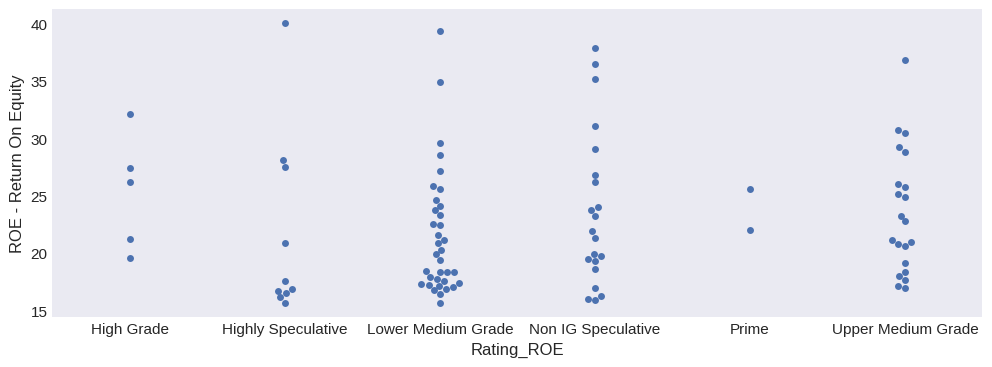

In [239]:
plt.figure(figsize=(12, 4))
sns.swarmplot(data=filled_portfoliox_df, x="Rating_ROE", y="ROE - Return On Equity")
plt.show()

Upper medium grade and lower medium grade make up most of the issuers in our portfolio, two risk classes encompassing A+ to BBB-.

### The next two pie charts plot the credit quality and asset allocation of our diversified portfolio and the benchmark market-driven model

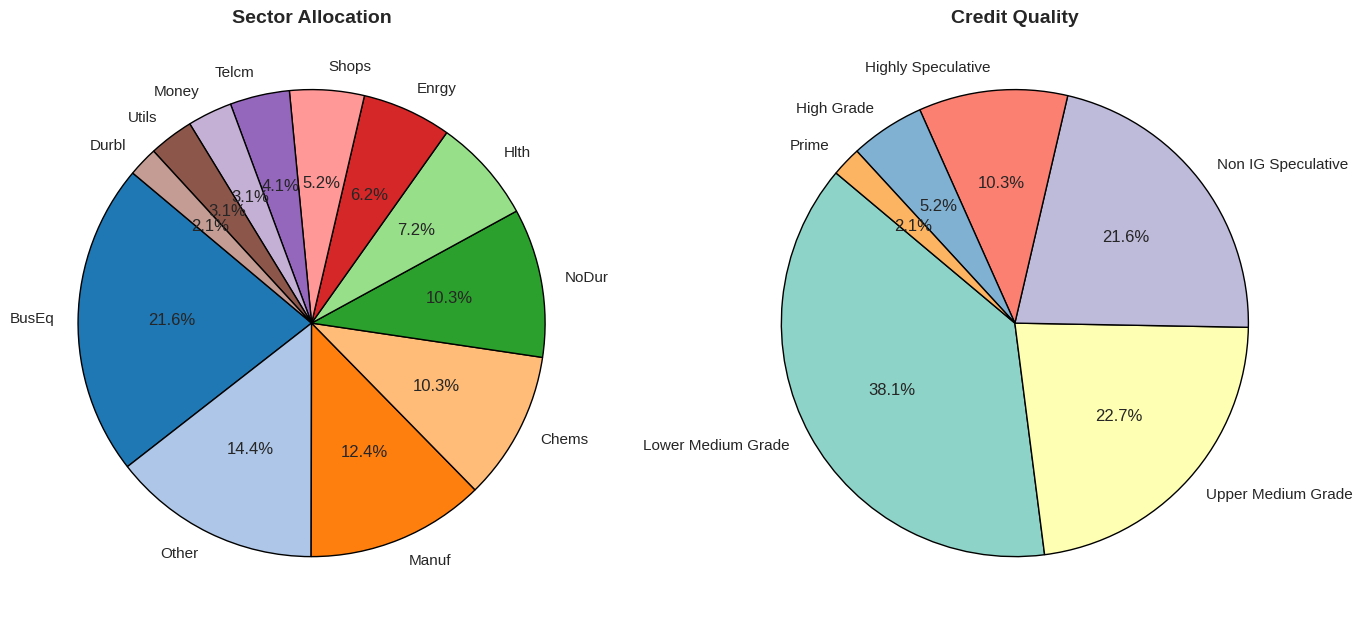

In [240]:
#import matplotlib.pyplot as plt

# Calculate sector allocation
sector_allocation = portfolio_df['Sector'].value_counts()
sectors = sector_allocation.index

# Calculate credit quality
credit_quality = portfolio_df['Rating'].value_counts()
credit_ratings = credit_quality.index

# Define colors for the pie charts
colors_sectors = plt.cm.tab20.colors[:len(sectors)]
colors_credit = plt.cm.Set3.colors[:len(credit_ratings)]

# Plotting the sector allocation pie chart
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(sector_allocation, labels=sectors, autopct='%1.1f%%', startangle=140, colors=colors_sectors,
        wedgeprops={'edgecolor': 'black'})
plt.title('Sector Allocation', fontsize=14, fontweight='bold')

# Plotting the credit quality pie chart
plt.subplot(1, 2, 2)
plt.pie(credit_quality, labels=credit_ratings, autopct='%1.1f%%', startangle=140, colors=colors_credit,
        wedgeprops={'edgecolor': 'black'})
plt.title('Credit Quality', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


Our ROE screens revealed a more diversified allocation across market sectors, highlighting established industries that are more likely to generate higher ROE. It is important to note that the dataset had limited exposure to financials

### Pie chart plot  of  Market-driven benchmark model Sector Allocation and Credit Quality

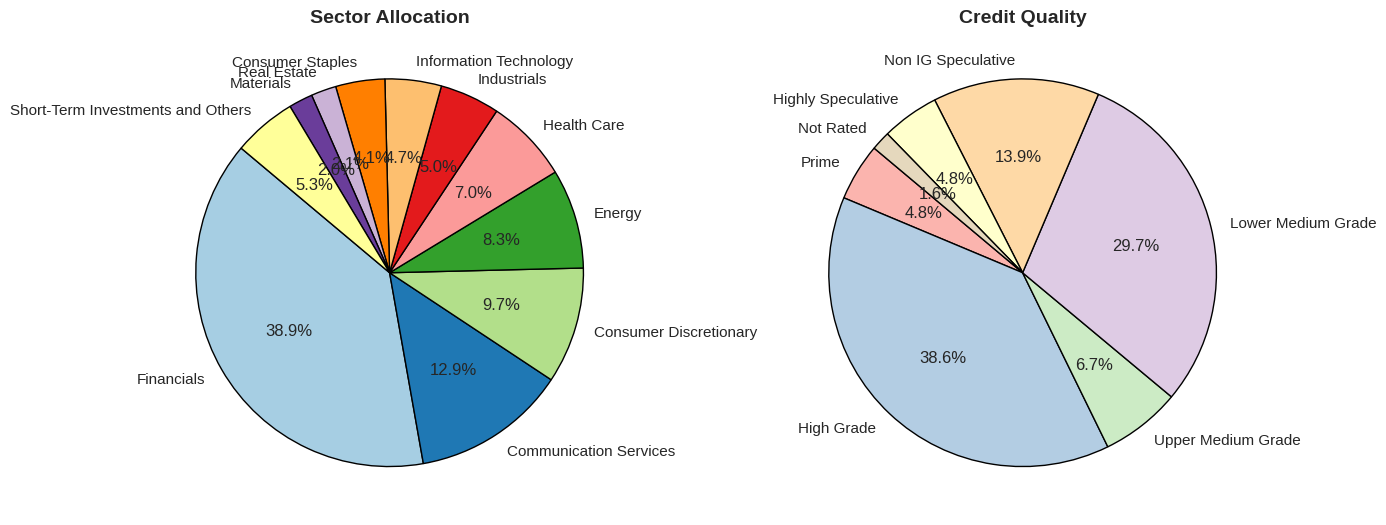

In [241]:
#import matplotlib.pyplot as plt

# Data for sector allocation from market driven paramenets
sectors = ['Financials', 'Communication Services', 'Consumer Discretionary', 'Energy', 'Health Care',
           'Industrials', 'Information Technology', 'Consumer Staples', 'Real Estate', 'Materials',
           'Short-Term Investments and Others']
sector_allocation = [38.9, 12.9, 9.7, 8.3, 7.0, 5.0, 4.7, 4.1, 2.1, 2.0, 5.3]

# credit rating mapped risk class in the EDA model
credit_ratings = ['Prime', 'High Grade', 'Upper Medium Grade', 'Lower Medium Grade', 'Non IG Speculative', 'Highly Speculative', 'Not Rated']
credit_quality = [4.8, 38.6, 6.7, 29.7, 13.9, 4.8, 1.6]

# Define colors
colors_sectors = plt.cm.Paired.colors
colors_credit = plt.cm.Pastel1.colors

# Plotting the sector allocation pie chart
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(sector_allocation, labels=sectors, autopct='%1.1f%%', startangle=140, colors=colors_sectors,
        wedgeprops={'edgecolor': 'black'})
plt.title('Sector Allocation', fontsize=14, fontweight='bold')

# Plotting the credit quality pie chart
plt.subplot(1, 2, 2)
plt.pie(credit_quality, labels=credit_ratings, autopct='%1.1f%%', startangle=140, colors=colors_credit,
        wedgeprops={'edgecolor': 'black'})
plt.title('Credit Quality', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


As the market returns to a normalized interest rate environment, portfolios driven by market dynamics are increasingly favoring financials, while maintaining lower exposure to higher credit risk

### We incorporate a grouped bar chart to visualize a credit quality comparison between the Diversified Portfolio and the Market-Driven Portfolio model

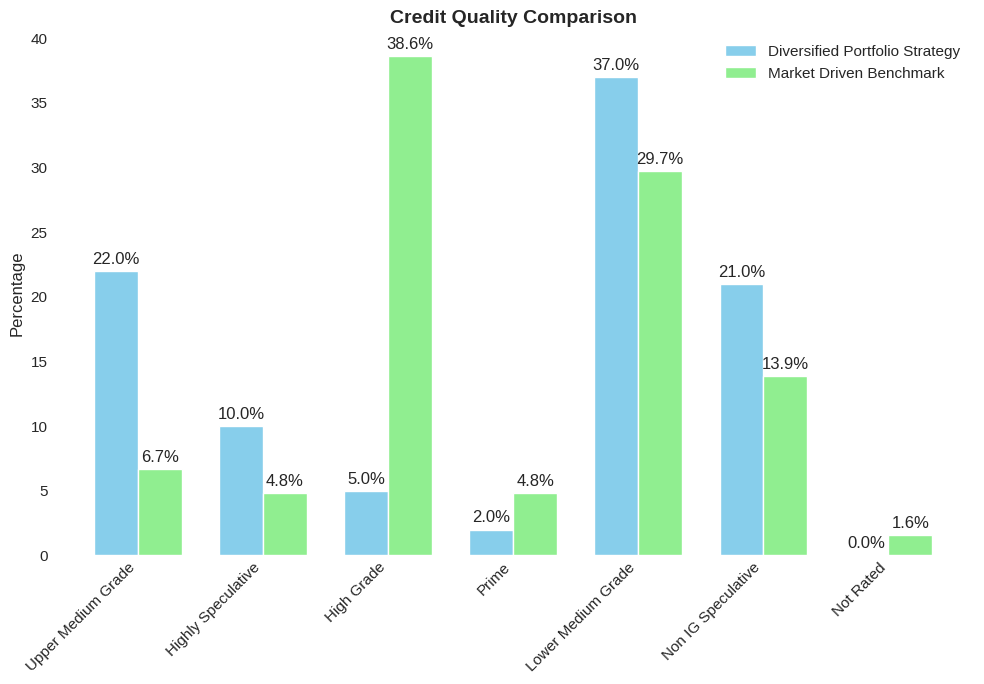

In [242]:
# Data for Diversified Portfolio Strategy
credit_quality = portfolio_df['Rating'].value_counts()
credit_ratings = credit_quality.index
credit_quality_values = credit_quality.values

# Data for market-driven benchmark
credit_ratingsbench = ['Prime', 'High Grade', 'Upper Medium Grade', 'Lower Medium Grade', 'Non IG Speculative', 'Highly Speculative', 'Not Rated']
credit_qualitybench = [4.8, 38.6, 6.7, 29.7, 13.9, 4.8, 1.6]

# Combine all unique ratings
all_ratings = list(set(credit_ratings) | set(credit_ratingsbench))

# Create dictionaries for easy lookup
portfolio_dict = dict(zip(credit_ratings, credit_quality_values))
benchmark_dict = dict(zip(credit_ratingsbench, credit_qualitybench))

# Prepare data for plotting
portfolio_data = [portfolio_dict.get(rating, 0) for rating in all_ratings]
benchmark_data = [benchmark_dict.get(rating, 0) for rating in all_ratings]

# Set up the plot
plt.figure(figsize=(10, 7))
ax = plt.gca()

# Set the width of each bar and the positions of the bars
width = 0.35
x = np.arange(len(all_ratings))

# Create the grouped bars
rects1 = ax.bar(x - width/2, portfolio_data, width, label='Diversified Portfolio Strategy', color='skyblue')
rects2 = ax.bar(x + width/2, benchmark_data, width, label='Market Driven Benchmark', color='lightgreen')

# Customize the plot
ax.set_ylabel('Percentage')
ax.set_title('Credit Quality Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(all_ratings, rotation=45, ha='right')
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Set background to white
ax.set_facecolor('white')

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Set border to black
for spine in ax.spines.values():
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()


The diversified portfolio's largest exposure is to the Lower Medium risk class, which corresponds to the S&P 500 median average rating of BBB+. In contrast, the market-driven portfolio has its largest exposure in the High Grade category ( range: AA to AA-), indicating potential uncertainty regarding the economic expansion cycle, inflation and its significant exposure to financials.

In [243]:
portfolio_df['Ticker'].unique()

array(['RYN', 'CXW', 'AMP', 'KOP', 'DLX', 'ALSN', 'HRB', 'AMKR', 'NFLX',
       'JWN', 'LLY', 'AMD', 'PEP', 'AMX', 'PKG', 'ROK', 'CVI', 'BMY',
       'TUP', 'VRNT', 'MERC', 'MMM', 'GIS', 'NXPI', 'XOM', 'HBI', 'RIO',
       'OII', 'SBUX', 'MSFT', 'LYB', 'CCEP', 'BDX', 'HAS', 'ILMN', 'VSH',
       'FLS', 'CDK', 'TAL', 'BIDU', 'SLGN', 'HAL', 'SJR', 'SAVE', 'ADP',
       'STZ', 'MOS', 'PHI', 'ORCL', 'COMP', 'JBHT', 'BAX', 'FICO', 'ALK',
       'NOC', 'NGG', 'SMG', 'LVS', 'OKE', 'AIR', 'NKE', 'ALGT', 'SWN',
       'DBD', 'BUD', 'EVC', 'CAL', 'CNI', 'FMC', 'DGX', 'CDNS', 'HRL',
       'CSX', 'UNP', 'INTU', 'ABB', 'BTU', 'GFI', 'SSL', 'FLO', 'BWA',
       'SRCL', 'FLEX', 'ARCO', 'APD', 'HXL', 'ALB', 'NOK', 'LXU', 'OLN',
       'BIIB', 'WAB', 'CMCO', 'NCR', 'ENDP', 'TGI', 'FISV'], dtype=object)

In [244]:
portfolio_df['Ticker'].count()

97

A review of companies in our stock screen revealed that two companies (ENPD, TUP) were either delisted or defaulted, while three were either spun off or acquired (SJR, NCR, CDK). These issuers have been excluded from our final analysis, which compares Diversified Portfolio returns against the S&P Equal Weight Index

### Line Plot of Equity Returns: An equally weighted Diversified Portfolio compared against the S&P Equal Weight Index

Shows performance returns for the year starting January 1, 2024, and ending January 31, 2025.

We import the time series stock tickers screened from our dataframe ***Portfolio_df*** utilizing ***yfinance***

Set the timeline for data extraction and select the ***Invesco S&P 500® Equal Weight ETF*** as a benchmark for our portfolio's performance.

Save the time series data ***stock_data.csv*** as a CSV file for plotting.


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Total Portfolio Return: 20.37%
Total S&P 500 Return: 17.59%
Annualized Portfolio Return: 18.64%
Annualized S&P 500 Equal Weight ETF: 16.11%


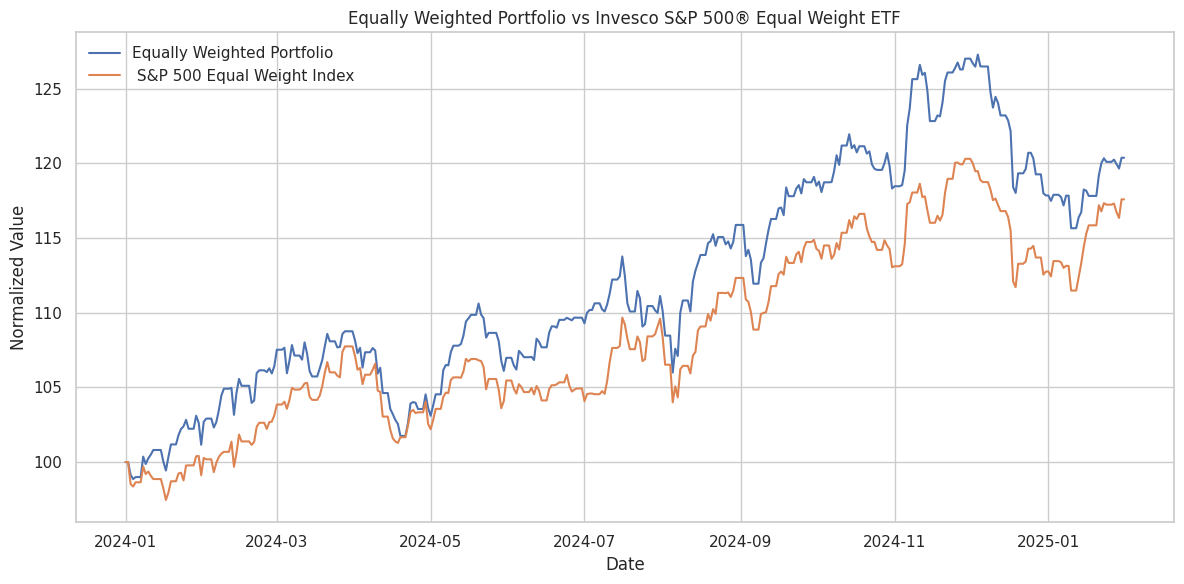

In [254]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# List of ticker symbols
ticker_symbols = ["RYN", "CXW", "AMP", "KOP", "DLX", "ALSN", "HRB", "AMKR",
                   'JWN', 'LLY', 'AMD', 'PEP', 'AMX', 'PKG', 'ROK', 'CVI', 'BMY','NFLX',
                   "VRNT", "MERC", "MMM", "GIS", "NXPI", "XOM", "HBI", "RIO",
                   "OII", "SBUX", "MSFT", "LYB", "CCEP", "BDX", "HAS", "ILMN", "VSH",
                   "FLS", "TAL", "BIDU", "SLGN", "HAL", "ADP","BAX", "FICO", "ALK",
                   "STZ", "MOS", "PHI", "ORCL", "COMP", "JBHT", "NKE", "ALGT", "EXE",
                   "NOC", "NGG", "SMG", "LVS", "OKE", "AIR", "DGX", "CDNS", "HRL",
                   "DBD", "BUD", "EVC", "CAL", "CNI", "FMC","GFI", "SSL", "FLO", "BWA",
                   "CSX", "UNP", "INTU", "ABBNY", "BTU", "WM", "FLEX", "ARCO", "APD", "HXL",
                   "ALB", "NOK", "LXU", "OLN","BIIB", "WAB", "CMCO", "NATL","TGI", "FI", ]  # Exclude ^GSPC for now

# Set start and end dates
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 1, 31)

# Fetch historical data for each ticker symbol
data = {}
for symbol in ticker_symbols:
    try:
        df = yf.download(symbol, start=start_date, end=end_date)
        data[symbol] = df['Close']
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Fetch S&P 500 data using SPY ETF as a proxy
sp500_data = yf.download('RSP', start=start_date, end=end_date) #Invesco S&P 500® Equal Weight ETF
data['^SPXEW'] = sp500_data['Close']

# Ensure all Series have the same index
date_range = pd.date_range(start=start_date, end=end_date)
for symbol in data:
    data[symbol] = data[symbol].reindex(date_range).ffill().bfill()  # Fill both forward and backward

# Create a DataFrame with the closing prices
df = pd.concat(data.values(), axis=1)
df.columns = data.keys()

# Check for missing values
#if df.isnull().values.any():
    #print("Missing values detected. Please check data.")
#else:
    #print("No missing values detected.")

# Calculate the equally weighted portfolio value
weights = [1/92] * 92  # Weights for NOK, OLN, and NATL
portfolio_value = df[ticker_symbols].dot(weights)

# Normalize the portfolio value and S&P 500 index to start at 100 for comparison
portfolio_value = (portfolio_value / portfolio_value.iloc[0]) * 100
sp500_value = (df["^SPXEW"] / df["^SPXEW"].iloc[0]) * 100 #^SPXEW is S&P 500 Equal Weight Index from which RSP is tracked

# Calculate total return for $1000 investment
initial_investment = 1000
final_portfolio_value = (portfolio_value.iloc[-1] / 100) * initial_investment
final_sp500_value = (sp500_value.iloc[-1] / 100) * initial_investment

total_portfolio_return = ((final_portfolio_value - initial_investment) / initial_investment) * 100
total_sp500_return = ((final_sp500_value - initial_investment) / initial_investment) * 100

print(f"Total Portfolio Return: {total_portfolio_return:.2f}%")
print(f"Total S&P 500 Return: {total_sp500_return:.2f}%")

# Calculate annualized returns
days = (end_date - start_date).days
annualized_portfolio_return = ((1 + total_portfolio_return/100) ** (365/days) - 1) * 100
annualized_sp500_return = ((1 + total_sp500_return/100) ** (365/days) - 1) * 100

print(f"Annualized Portfolio Return: {annualized_portfolio_return:.2f}%")
print(f"Annualized S&P 500 Equal Weight ETF: {annualized_sp500_return:.2f}%")

# Plot the portfolio value and S&P 500 index using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=portfolio_value, label='Equally Weighted Portfolio')
sns.lineplot(data=sp500_value, label=' S&P 500 Equal Weight Index')
plt.title('Equally Weighted Portfolio vs Invesco S&P 500® Equal Weight ETF')
plt.ylabel('Normalized Value')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()


Our task was to construct a diversified portfolio using a dataset of corporate credit and financial ratios. We aimed to build the portfolio based on the thesis that a company's ROE and ROTE (***real return on the owner's capital***) would approximate its return on common stock. The portfolio was further refined by optimizing for OCFP and screening for credit risk.

The Diversified Portfolio has outpaced the returns on the equally weighted S&P 500 index over the last 12 months.

In our diversified portfolio, 2 companies were delisted or defaulted, compared to 12 companies among the largest U.S. corporations listed on the S&P 500 and Nasdaq LTM, highlighting comparable median credit ratings.


#### For further review:

Our analysis of market returns encompassed the last 12 months; however, this study should be evaluated over a longer time horizon, normalizing position returns with libraries such as Pyfolio and Stockdex.

### Plots the continuous LTM of the Diversified Portfolio versus the S&P 500 Equal Weight Index.

Note: If underlying positions in the Diversified Portfolio change (e.g., due to a buyout or delisting), the plot will return ***Missing values detected. Please check data***

In [251]:
#!pip install stockdex

No missing values detected.
Total Portfolio Return: 8.87%
Total S&P 500 Return: 9.81%


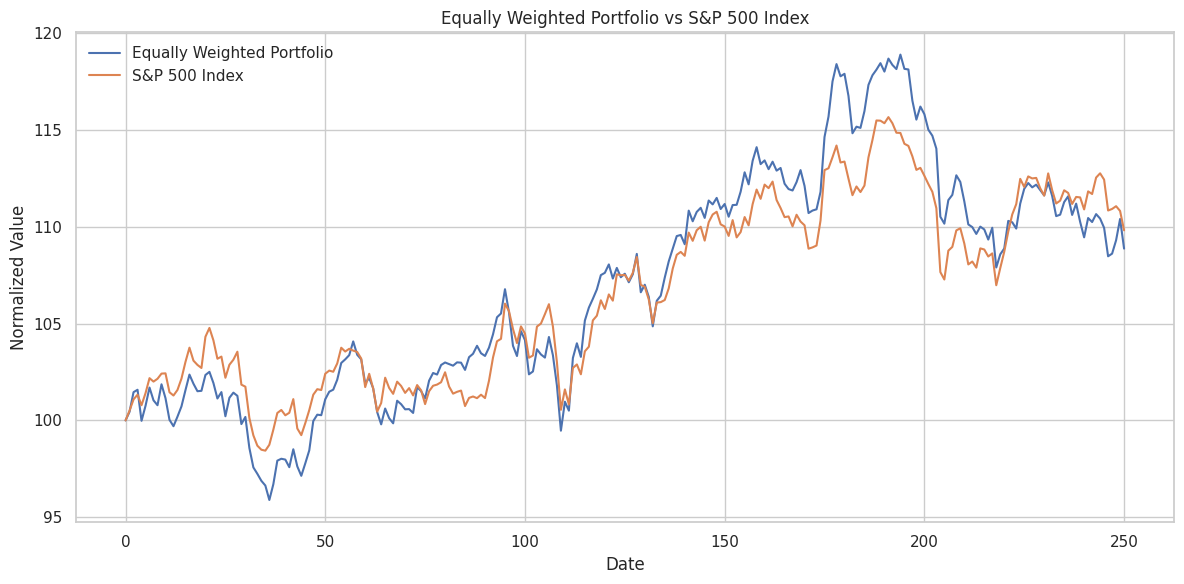

In [252]:
#!pip install stockdex
from stockdex import Ticker

# List of ticker symbols
ticker_symbols = ["RYN", "CXW", "AMP", "KOP", "DLX", "ALSN", "HRB", "AMKR",
       'JWN', 'LLY', 'AMD', 'PEP', 'AMX', 'PKG', 'ROK', 'CVI', 'BMY','NFLX',
       "VRNT", "MERC", "MMM", "GIS", "NXPI", "XOM", "HBI", "RIO",
       "OII", "SBUX", "MSFT", "LYB", "CCEP", "BDX", "HAS", "ILMN", "VSH",
       "FLS", "TAL", "BIDU", "SLGN", "HAL", "ADP","BAX", "FICO", "ALK",
       "STZ", "MOS", "PHI", "ORCL", "COMP", "JBHT", "NKE", "ALGT", "EXE",
       "NOC", "NGG", "SMG", "LVS", "OKE", "AIR", "DGX", "CDNS", "HRL",
       "DBD", "BUD", "EVC", "CAL", "CNI", "FMC","GFI", "SSL", "FLO", "BWA",
       "CSX", "UNP", "INTU", "ABBNY", "BTU", "WM", "FLEX", "ARCO", "APD", "HXL",
       "ALB", "NOK", "LXU", "OLN","BIIB", "WAB", "CMCO", "NATL","TGI", "FI","^SPXEW"]  # ^GSPC is the ticker for S&P 500 index

# Fetch historical data for each ticker symbol
data = {}
for symbol in ticker_symbols:
    ticker = Ticker(ticker=symbol)
    data[symbol] = ticker.yahoo_api_price(range='1y', dataGranularity='1d')['close']

# Create a DataFrame with the closing prices
df = pd.DataFrame(data)

# Check for missing values
if df.isnull().values.any():
    print("Missing values detected. Please check data.")
else:
    print("No missing values detected.")


# Calculate the equally weighted portfolio value
weights = [1/92]* 92  # Weights for MSFT, AAPL, and NVDA
portfolio_value = df[ticker_symbols[:-1]].dot(weights)

# Normalize the portfolio value and S&P 500 index to start at 100 for comparison
portfolio_value = (portfolio_value / portfolio_value.iloc[0]) * 100
sp500_value = (df["^SPXEW"] / df["^SPXEW"].iloc[0]) * 100

# Calculate total return for $1000 investment
initial_investment = 1000
final_portfolio_value = (portfolio_value.iloc[-1] / 100) * initial_investment
final_sp500_value = (sp500_value.iloc[-1] / 100) * initial_investment

total_portfolio_return = ((final_portfolio_value - initial_investment) / initial_investment) * 100
total_sp500_return = ((final_sp500_value - initial_investment) / initial_investment) * 100

print(f"Total Portfolio Return: {total_portfolio_return:.2f}%")
print(f"Total S&P 500 Return: {total_sp500_return:.2f}%")

# Plot the portfolio value and S&P 500 index using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=portfolio_value, label='Equally Weighted Portfolio')
sns.lineplot(data=sp500_value, label='S&P 500 Index')
plt.title('Equally Weighted Portfolio vs S&P 500 Index')
plt.ylabel('Normalized Value')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()


End of notebook